# Data Visualization with Swing

A picture is worth a thousand words. In machine learning, we usually handle high-dimensional data, which is impossible to draw on display directly. But a variety of statistical plots are tremendously valuable for us to grasp the characteristics of many data points. Smile provides data visualization tools such as plots and maps for researchers to understand information more easily and quickly.

Smile provides many advanced interactive statistical plots with Java's Swing graphics library. To render Swing plot canvas in Notebook, we generate an image and embedded it into HTML. Therefore, we lose the interactive functionality. To fully leverage Swing-based plots, we recommend the users to use Smile's shell.

First, let's import Smile and also add an `implict` function to display Swing's `JComponent` in almond. 

In [ ]:
import $ivy.`com.github.haifengl::smile-scala:2.2.2`
import $ivy.`org.slf4j:slf4j-simple:1.7.30`  

import java.lang.Math._
import java.awt.Color.{BLACK, BLUE, CYAN, DARK_GRAY, GRAY, GREEN, LIGHT_GRAY, MAGENTA, ORANGE, PINK, RED, WHITE, YELLOW}
import smile.plot.swing.Palette.{DARK_RED, VIOLET_RED, DARK_GREEN, LIGHT_GREEN, PASTEL_GREEN, FOREST_GREEN, GRASS_GREEN, NAVY_BLUE, SLATE_BLUE, ROYAL_BLUE, CADET_BLUE, MIDNIGHT_BLUE, SKY_BLUE, STEEL_BLUE, DARK_BLUE, DARK_MAGENTA, DARK_CYAN, PURPLE, LIGHT_PURPLE, DARK_PURPLE, GOLD, BROWN, SALMON, TURQUOISE, BURGUNDY, PLUM}
import smile.plot.swing._
import smile.plot.show
import smile.interpolation._
import smile.math.matrix._
import smile.stat.distribution._
import smile._

System.setProperty("java.awt.headless", "true")
implicit def render(canvas: javax.swing.JComponent): Unit = {
  publish.html(smile.plot.swing.img(canvas))
}

Now let's plot a heart. Math is beautiful, isn't it?


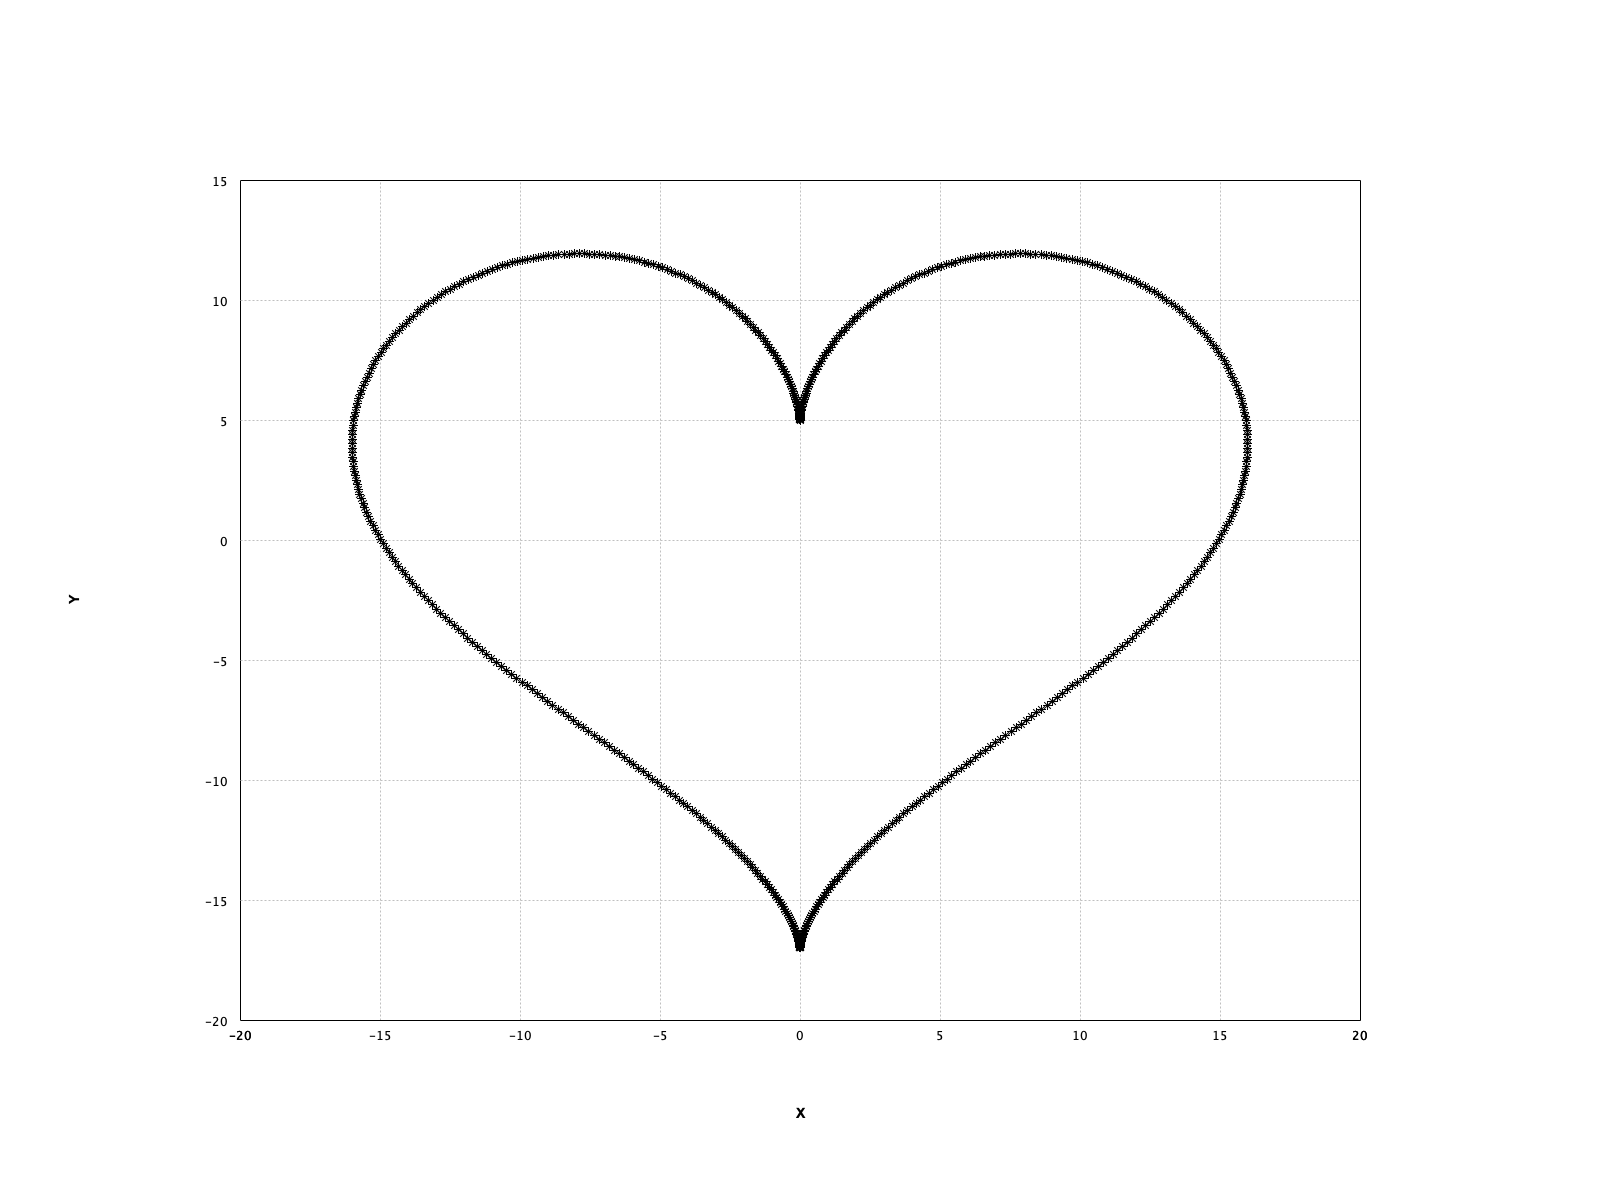

heart: IndexedSeq[Array[Double]] = Vector(
  Array(-6.463732966847141E-8, -16.999960683595546),
  Array(-2.492524155144247E-5, -16.997917101644497),
  Array(-1.6104112289149345E-4, -16.992774931671576),
  Array(-5.042681728047771E-4, -16.984537273625897),
  Array(-0.001150255171237311, -16.973209090042378),
  Array(-0.002194348113494316, -16.958797198160877),
  Array(-0.0037314948126257923, -16.941310259102387),
  Array(-0.005856149864141234, -16.920758764121906),
  Array(-0.008662180059536085, -16.897155017962813),
  Array(-0.012242770334712043, -16.87051311934288),
  Array(-0.01669033033888591, -16.84084893860716),
  Array(-0.02209640170902985, -16.808180092588184),
  Array(-0.028551566134240997, -16.772525916718998),
  Array(-0.03614535429373789, -16.73390743444939),
  Array(-0.044966155751380375, -16.692347324020762),
  Array(-0.05510112988876378, -16.647869882659734),
  Array(-0.06663611795798619, -16.60050098825533),
  Array(-0.07965555633418872, -16.550268058589143),
  Array(-0.

In [5]:
val heart = -314 to 314 map { i =>
    val t = i / 100.0
    val x = 16 * pow(sin(t), 3)
    val y = 13 * cos(t) - 5 * cos(2*t) - 2 * cos(3*t) - cos(4*t)
    Array(x, y)
}

show(plot(heart.toArray))

Note that the function `plot` returns a `PlotCanvas` that encapsulates the plot specification. The function `show` does the renderring job (with the help of implict argument `display` that we defined earlier).

## Scatter Plot

A scatter plot displays data as a collection of points. The points can be color-coded, which is very useful for classification tasks. The user can use `plot` functions to draw scatter plot easily.
```
def plot(data: Array[Array[Double]], legend: Char = '*', color: Color = BLACK): PlotCanvas

def plot(data: Array[Array[Double]], labels: Array[String]): PlotCanvas

def plot(data: Array[Array[Double]], label: Array[Int], legend: Char, palette: Array[Color]): PlotCanvas

def plot(data: Array[Array[Double]], label: Array[Int], legend: Array[Char], palette: Array[Color]): PlotCanvas
```
The legends are as follows.

- . : dot
- \+ : \+
- \- : \-
- | : |
- \* : star
- x : x
- o : circle
- O : large circle
- @ : solid circle
- \# : large solid circle
- s : square
- S : large square
- q : solid square
- Q : large solid square

For any other char, the data point will be drawn as a dot.

The functions return a `PlotCanvas`, which can be used to control the plot programmatically. The user can also use the popup context menu by right mouse click to print, change the title, axis labels, and font, etc.

On the desktop, the user can zoom in/out by mouse wheel. For 2D plot, the user can shift the coordinates by moving mouse after double click. The user can also select an area by mouse for detailed view. For 3D plot, the user can rotate the view by dragging mouse.

[scala-interpreter-1] INFO smile.io.Arff - Read ARFF relation iris



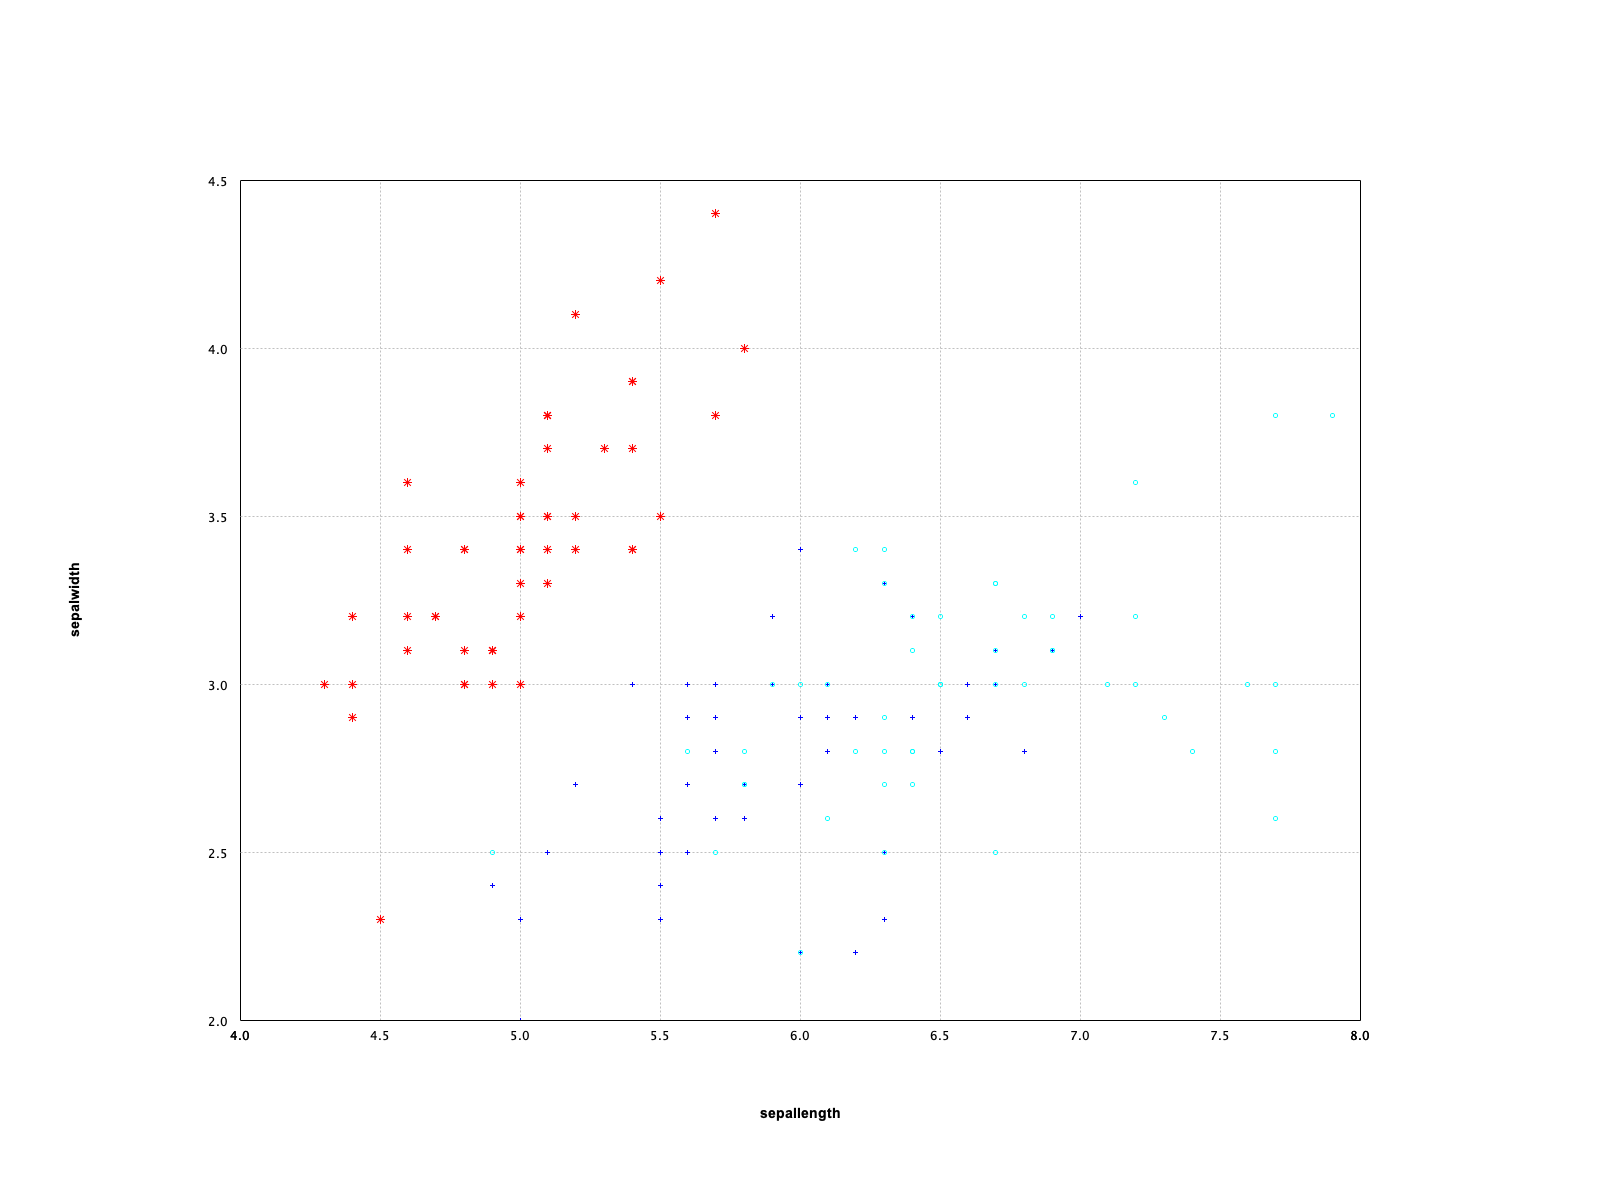

iris: data.DataFrame = [sepallength: float, sepalwidth: float, petallength: float, petalwidth: float, class: byte nominal[Iris-setosa, Iris-versicolor, Iris-virginica]]
+-----------+----------+-----------+----------+-----------+
|sepallength|sepalwidth|petallength|petalwidth|      class|
+-----------+----------+-----------+----------+-----------+
|        5.1|       3.5|        1.4|       0.2|Iris-setosa|
|        4.9|         3|        1.4|       0.2|Iris-setosa|
|        4.7|       3.2|        1.3|       0.2|Iris-setosa|
|        4.6|       3.1|        1.5|       0.2|Iris-setosa|
|          5|       3.6|        1.4|       0.2|Iris-setosa|
|        5.4|       3.9|        1.7|       0.4|Iris-setosa|
|        4.6|       3.4|        1.4|       0.3|Iris-setosa|
|          5|       3.4|        1.5|       0.2|Iris-setosa|
|        4.4|       2.9|        1.4|       0.2|Iris-setosa|
|        4.9|       3.1|        1.5|       0.1|Iris-setosa|
+-----------+----------+-----------+----------+----

In [6]:
val iris = read.arff("data/weka/iris.arff")
val x = iris.select(0, 1).toArray
val y = iris("class").toIntArray
val canvas = plot(x, y, Array('*', '+', 'o'), Array(RED, BLUE, CYAN))
val names = iris.names
canvas.setAxisLabels(names(0), names(1))
show(canvas)

In this example, we plot the first two columns of Iris data. We use the class label for legend and color coding. It is also easy to draw a 3D plot.


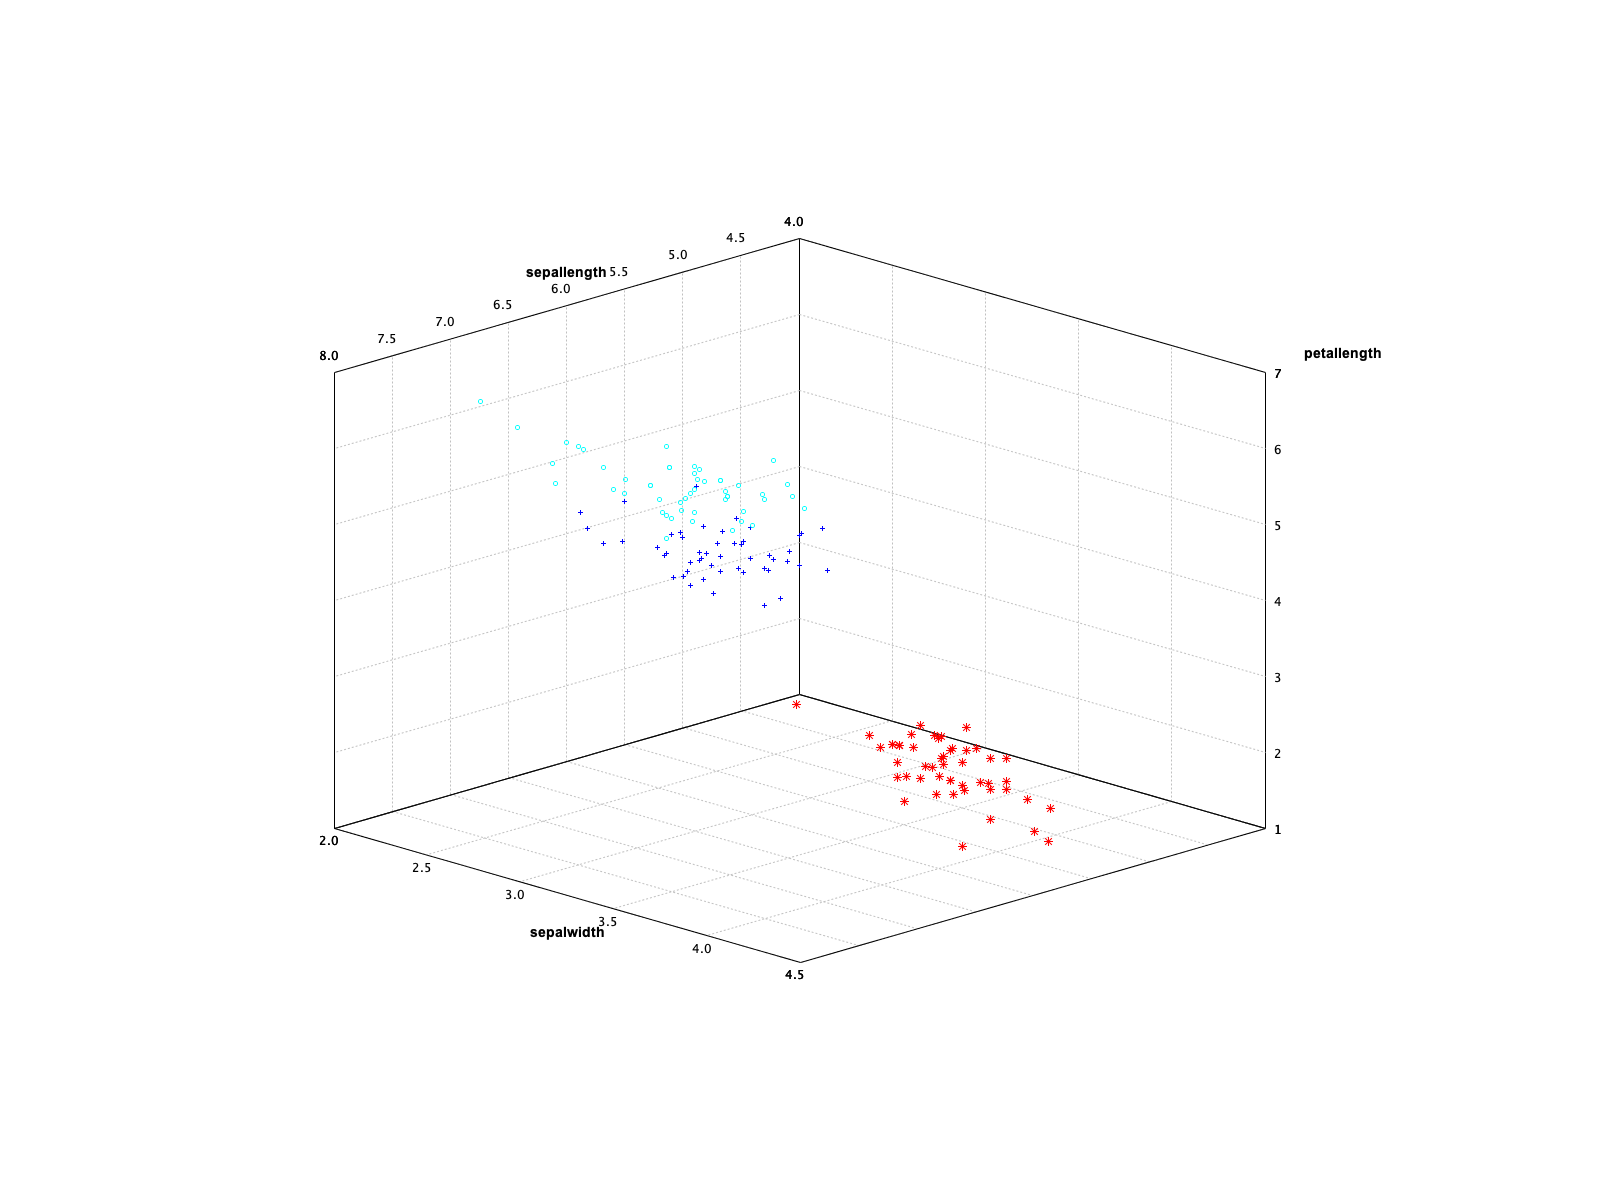

x: Array[Array[Double]] = Array(
  Array(5.099999904632568, 3.5, 1.399999976158142),
  Array(4.900000095367432, 3.0, 1.399999976158142),
  Array(4.699999809265137, 3.200000047683716, 1.2999999523162842),
  Array(4.599999904632568, 3.0999999046325684, 1.5),
  Array(5.0, 3.5999999046325684, 1.399999976158142),
  Array(5.400000095367432, 3.9000000953674316, 1.7000000476837158),
  Array(4.599999904632568, 3.4000000953674316, 1.399999976158142),
  Array(5.0, 3.4000000953674316, 1.5),
  Array(4.400000095367432, 2.9000000953674316, 1.399999976158142),
  Array(4.900000095367432, 3.0999999046325684, 1.5),
  Array(5.400000095367432, 3.700000047683716, 1.5),
  Array(4.800000190734863, 3.4000000953674316, 1.600000023841858),
  Array(4.800000190734863, 3.0, 1.399999976158142),
  Array(4.300000190734863, 3.0, 1.100000023841858),
  Array(5.800000190734863, 4.0, 1.2000000476837158),
  Array(5.699999809265137, 4.400000095367432, 1.5),
  Array(5.400000095367432, 3.9000000953674316, 1.2999999523162842),


In [7]:
val x = iris.select(0, 1, 2).toArray // take first three columns
val canvas = plot(x, y, Array('*', '+', 'o'), Array(RED, BLUE, CYAN))
canvas.setAxisLabels(names(0), names(1), names(2))
show(canvas)

However, the Iris data has four attributes. So even 3D plot is not sufficient to see the whole picture. A general practice is plot all the attribute pairs. For example,


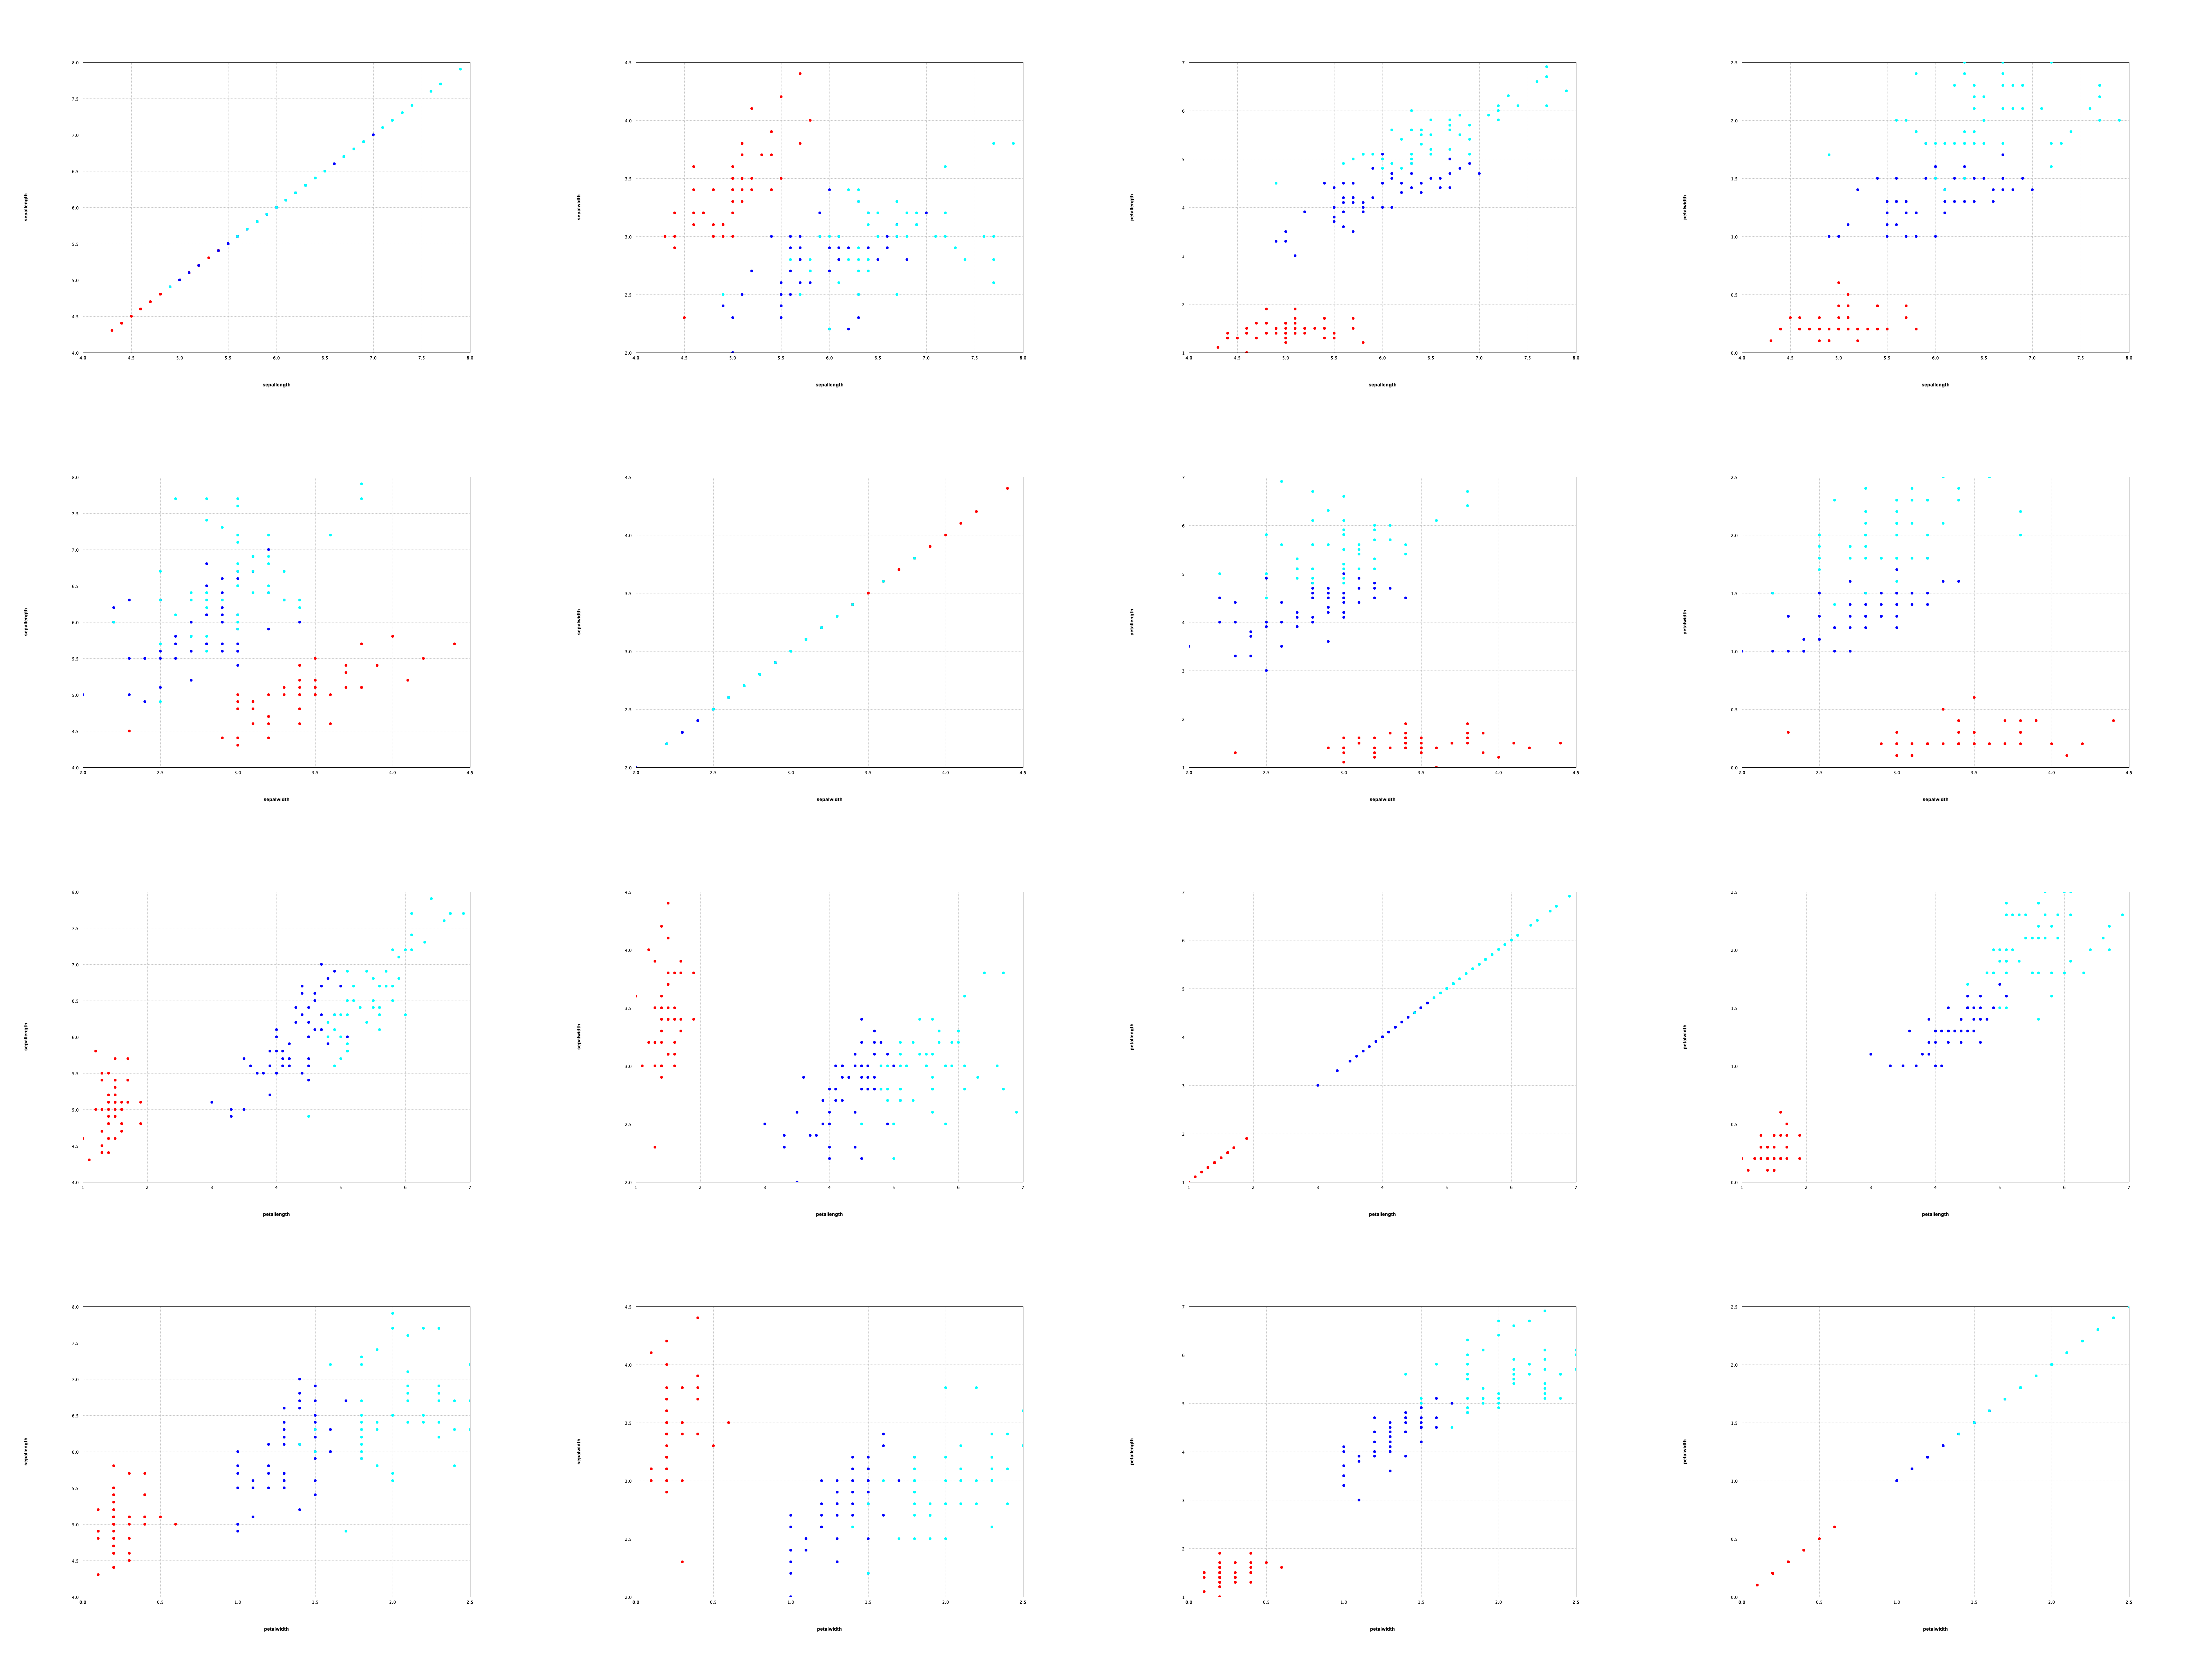

In [8]:
show(plot(iris, "class", '#', Array(RED, BLUE, CYAN)))

## Box Plot

The box plot is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum.

Box plots can be useful to display differences between populations without making any assumptions of the underlying statistical distribution: they are non-parametric. The spacings between the different parts of the box help indicate the degree of dispersion (spread) and skewness in the data, and identify outliers.


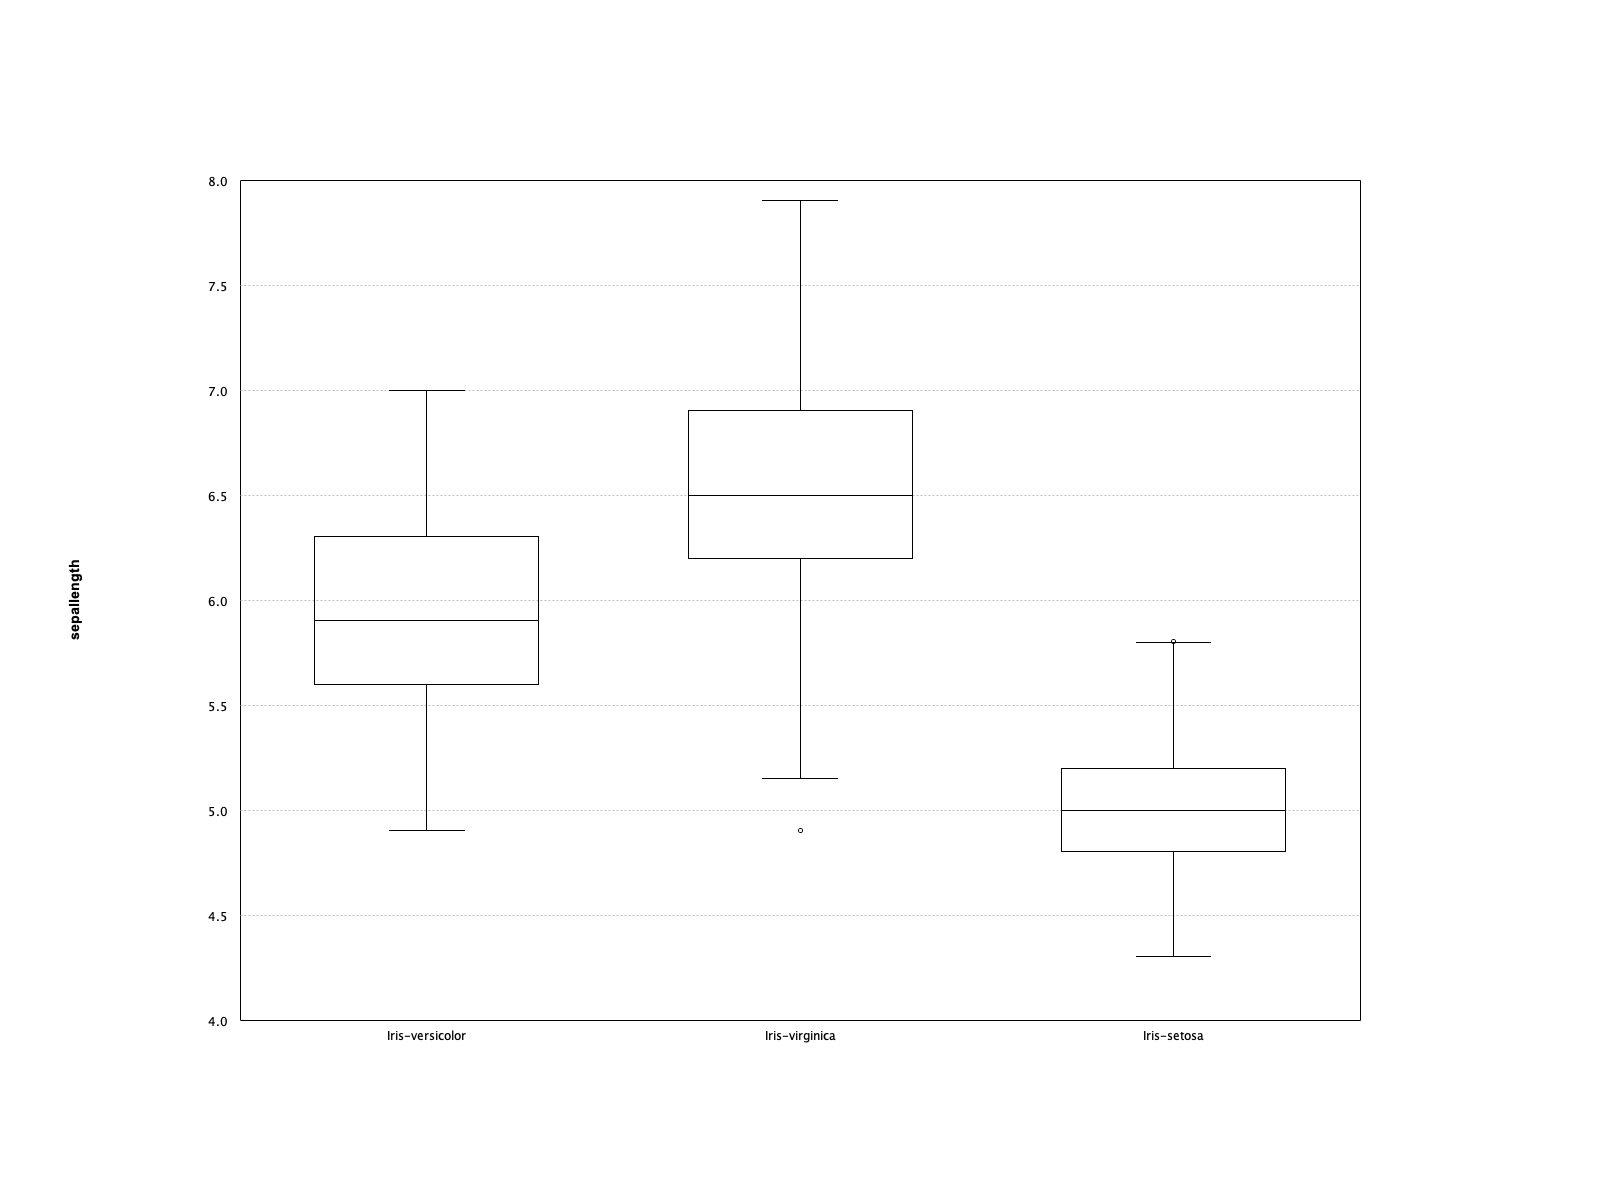

groups: Map[String, Array[(Double, String)]] = Map(
  "Iris-versicolor" -> Array(
    (7.0, "Iris-versicolor"),
    (6.400000095367432, "Iris-versicolor"),
    (6.900000095367432, "Iris-versicolor"),
    (5.5, "Iris-versicolor"),
    (6.5, "Iris-versicolor"),
    (5.699999809265137, "Iris-versicolor"),
    (6.300000190734863, "Iris-versicolor"),
    (4.900000095367432, "Iris-versicolor"),
    (6.599999904632568, "Iris-versicolor"),
    (5.199999809265137, "Iris-versicolor"),
    (5.0, "Iris-versicolor"),
    (5.900000095367432, "Iris-versicolor"),
    (6.0, "Iris-versicolor"),
    (6.099999904632568, "Iris-versicolor"),
    (5.599999904632568, "Iris-versicolor"),
    (6.699999809265137, "Iris-versicolor"),
    (5.599999904632568, "Iris-versicolor"),
    (5.800000190734863, "Iris-versicolor"),
    (6.199999809265137, "Iris-versicolor"),
    (5.599999904632568, "Iris-versicolor"),
    (5.900000095367432, "Iris-versicolor"),
    (6.099999904632568, "Iris-versicolor"),
    (6.3000001907348

In [9]:
val groups = (iris("sepallength").toDoubleArray zip iris("class").toStringArray).groupBy(_._2)
val labels = groups.keys.toArray
val data = groups.values.map { a => a.map(_._1) }.toArray
val canvas = boxplot(data, labels)
canvas.setAxisLabels("", "sepallength")
show(canvas)

## Histogram

A histogram is a graphical representation of the distribution of numerical data. The range of values is divided into a series of consecutive, non-overlapping intervals/bins. The bins must be adjacent, and are usually equal size.
```
    def hist(data: Array[Double]): PlotCanvas
    def hist(data: Array[Double], k: Int): PlotCanvas
    def hist(data: Array[Double], breaks: Array[Double]): PlotCanvas
``` 
where k is the number of bins (10 by default), or you can also specify an array of the breakpoints between bins.

Let's apply the histogram to an interesting data: the wisdom of crowds. The original experiment took place about a hundred years ago at a county fair in England. The fair had a guess the weight of the ox contest. Francis Galton calculated the average of all guesses, which is right to within one pound.

Recently, NPR Planet Money ran the experiment again. NPR posted a couple of pictures of a cow (named Penelope) and asked people to guess her weight. They got over 17,000 responses. The average of guesses was 1,287 pounds, which is pretty close to Penelope's weight 1,355 pounds.


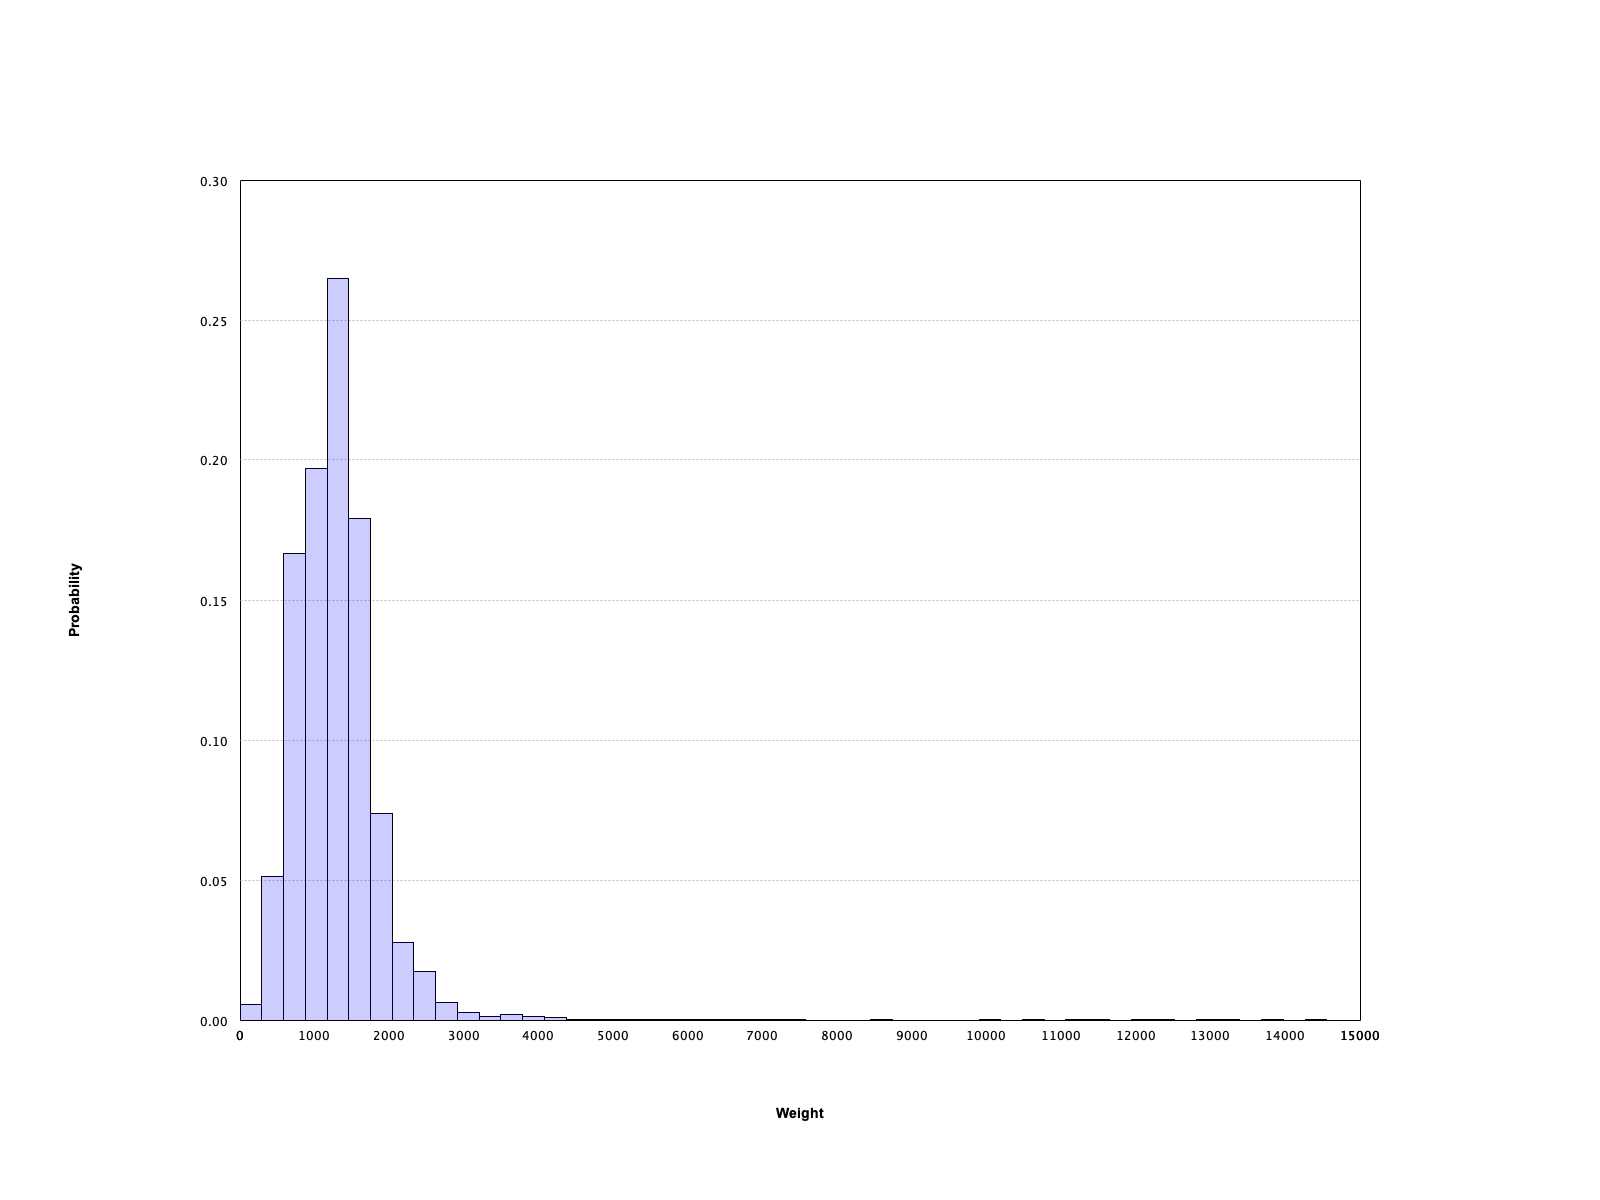

cow: Array[Double] = Array(
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.321,
  2.0,
  3.0,
  3.141592654,
  2.489913124,
  2.642729366,
  2.795545607,
  2.948361848,
  60.0,
  69.0,
  100.0,
  100.0,
  102.0,
  109.0,
  144.0,
  146.0,
  146.0,
  155.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
  165.0,
...
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res9_2: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [10]:
val cow = read.csv("data/npr/cow.txt", header = false)("V1").toDoubleArray
val canvas = hist(cow, 50)
canvas.setAxisLabels("Weight", "Probability")
show(canvas)

The histogram gives a rough sense of the distribution of crowd guess, which has a long tail. Filter out the weights over 3500 pounds, the histogram shows more details.


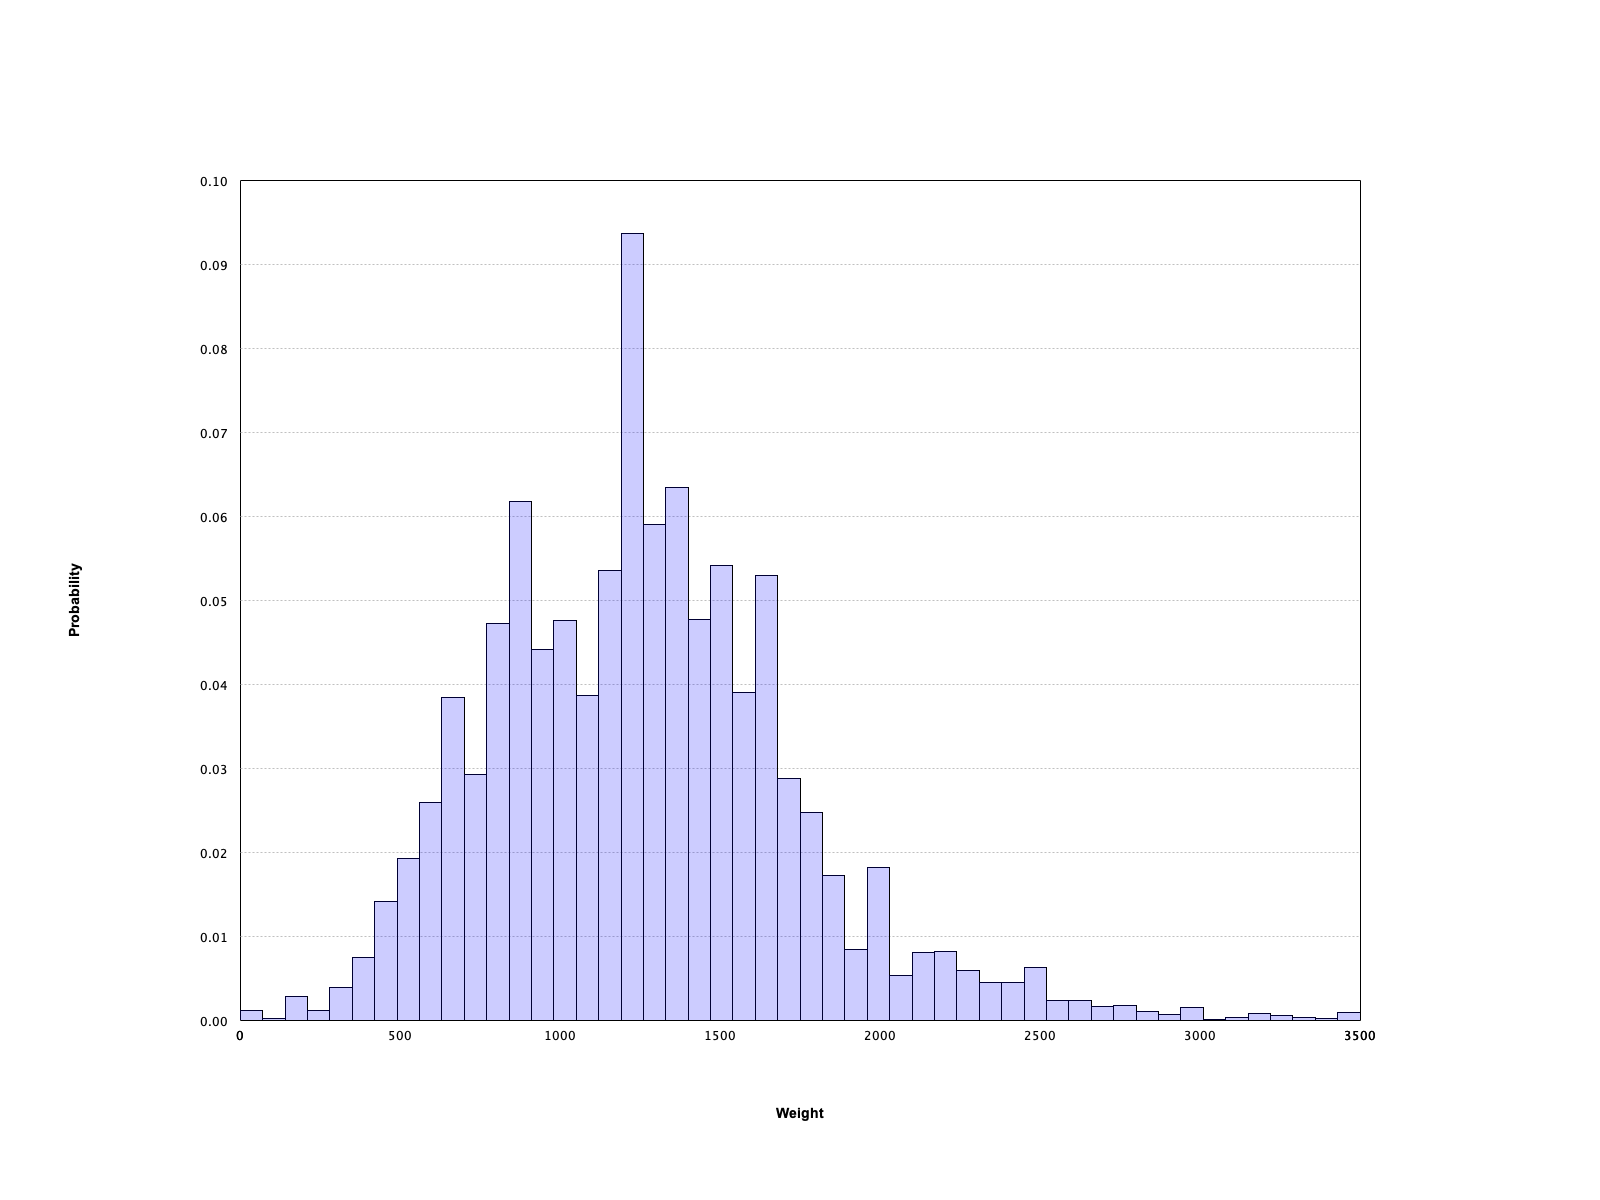

canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res10_1: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [11]:
val canvas = hist(cow.filter(_ <= 3500), 50)
canvas.setAxisLabels("Weight", "Probability")
show(canvas)

Smile also supports histograms that display the distribution of 2-dimensional data.
```
    def hist(data: Array[Array[Double]]): PlotCanvas
    def hist(data: Array[Array[Double]], k: Int): PlotCanvas
    def hist(data: Array[Array[Double]], xbins: Int, ybins: Int): PlotCanvas
``` 
Here we generate a data set from a 2-dimensional Gaussian distribution.

[scala-interpreter-1] INFO smile.math.matrix.Factory - smile-netlib module is available.
Mar 11, 2020 7:59:58 PM com.github.fommil.jni.JniLoader liberalLoad
INFO: successfully loaded /var/folders/cb/577dvd4n2db0ghdn3gn7ss0h0000gn/T/jniloader423635212370331074netlib-native_system-osx-x86_64.jnilib
[scala-interpreter-1] INFO smile.math.MathEx - Set RNG seed 19650218 for thread scala-interpreter-1



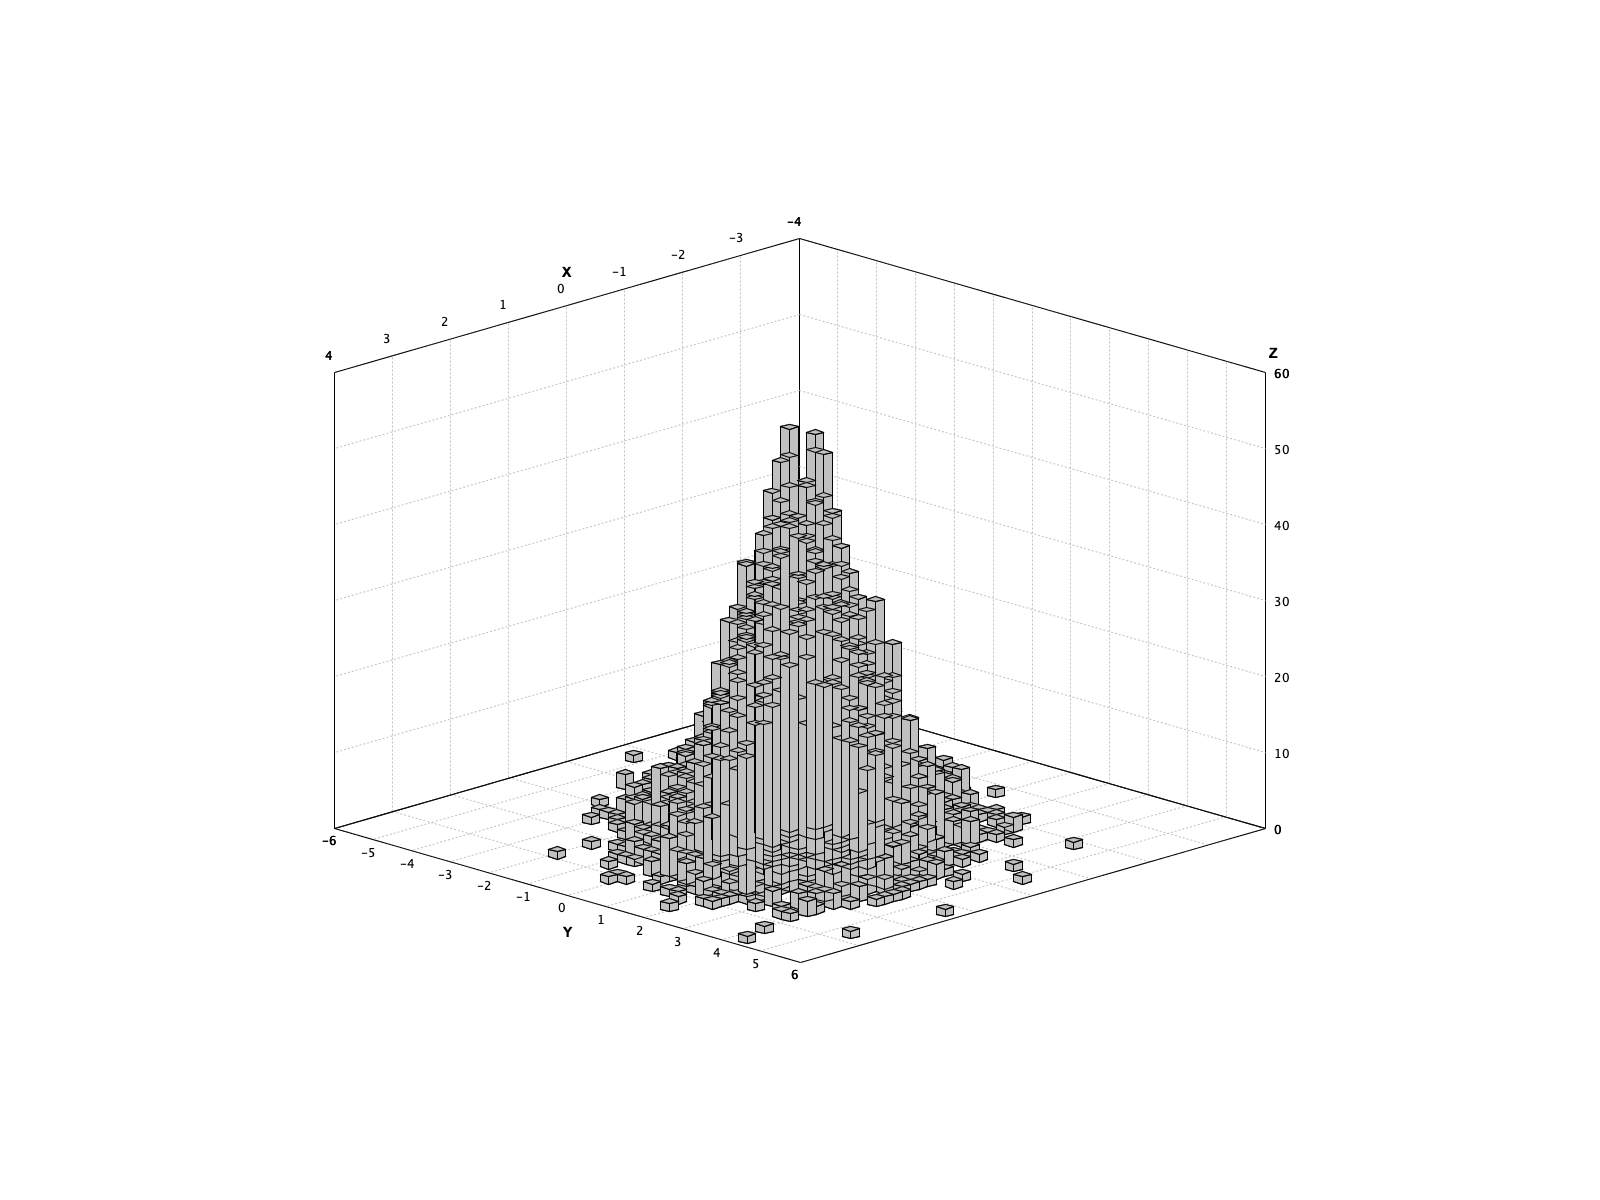

gauss: MultivariateGaussianDistribution = Multivariate Gaussian Distribution:
mu = [0.0 0.0]
Sigma = [
	1.0 0.6 
	0.6 2.0 
	]
data: IndexedSeq[Array[Double]] = Vector(
  Array(-0.8350544111551007, -1.5981457239777408),
  Array(1.6976609343349656, -1.53520782026013),
  Array(-0.09664813808347733, -0.6698409937073839),
  Array(-1.1434574512374056, -0.9501830545606831),
  Array(-0.4544365569406856, 0.5927107080440696),
  Array(-0.38992925124380556, -0.4070900924419284),
  Array(1.303639211977636, 0.08817762397003714),
  Array(0.12138619499997627, -0.23832200198721565),
  Array(-2.3605019502606774, -2.3605439997775726),
  Array(0.3454900946280784, -1.3707083273145069),
  Array(1.222229722953877, -0.48276748962853766),
  Array(-1.586164570380963, -4.003842458481809),
  Array(-1.0988903660043143, -1.5607842953909759),
  Array(0.579824880558463, 1.7051660532921573),
  Array(-0.3053961035606508, 2.60248362698417),
  Array(-0.6668969222261781, 0.13950511592237064),
  Array(-1.3943950966962708, 

In [12]:
val gauss = new MultivariateGaussianDistribution(Array(0.0, 0.0), Matrix.of(Array(Array(1.0, 0.6), Array(0.6, 2.0))))
val data = (0 until 10000) map { i: Int => gauss.rand }
show(hist(data.toArray, 50))

## Q-Q Plot

A Q–Q plot ("Q" stands for quantile) is a probability plot for comparing two probability distributions by plotting their quantiles against each other. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate).
```
    def qqplot(x: Array[Double], d: Distribution): PlotCanvas
    def qqplot(x: Array[Double], y: Array[Double]): PlotCanvas

    def qqplot(x: Array[Int], d: DiscreteDistribution): PlotCanvas
    def qqplot(x: Array[Int], y: Array[Int]): PlotCanvas
``` 
Smile supports the Q-Q plot of samples to a given distribution and also of two sample sets. The second distribution/samples is optional. If missing, we assume it the standard Gaussian distribution.

In what follows, we generate a random sample set from standard Gaussian distribution and draw its Q-Q plot.


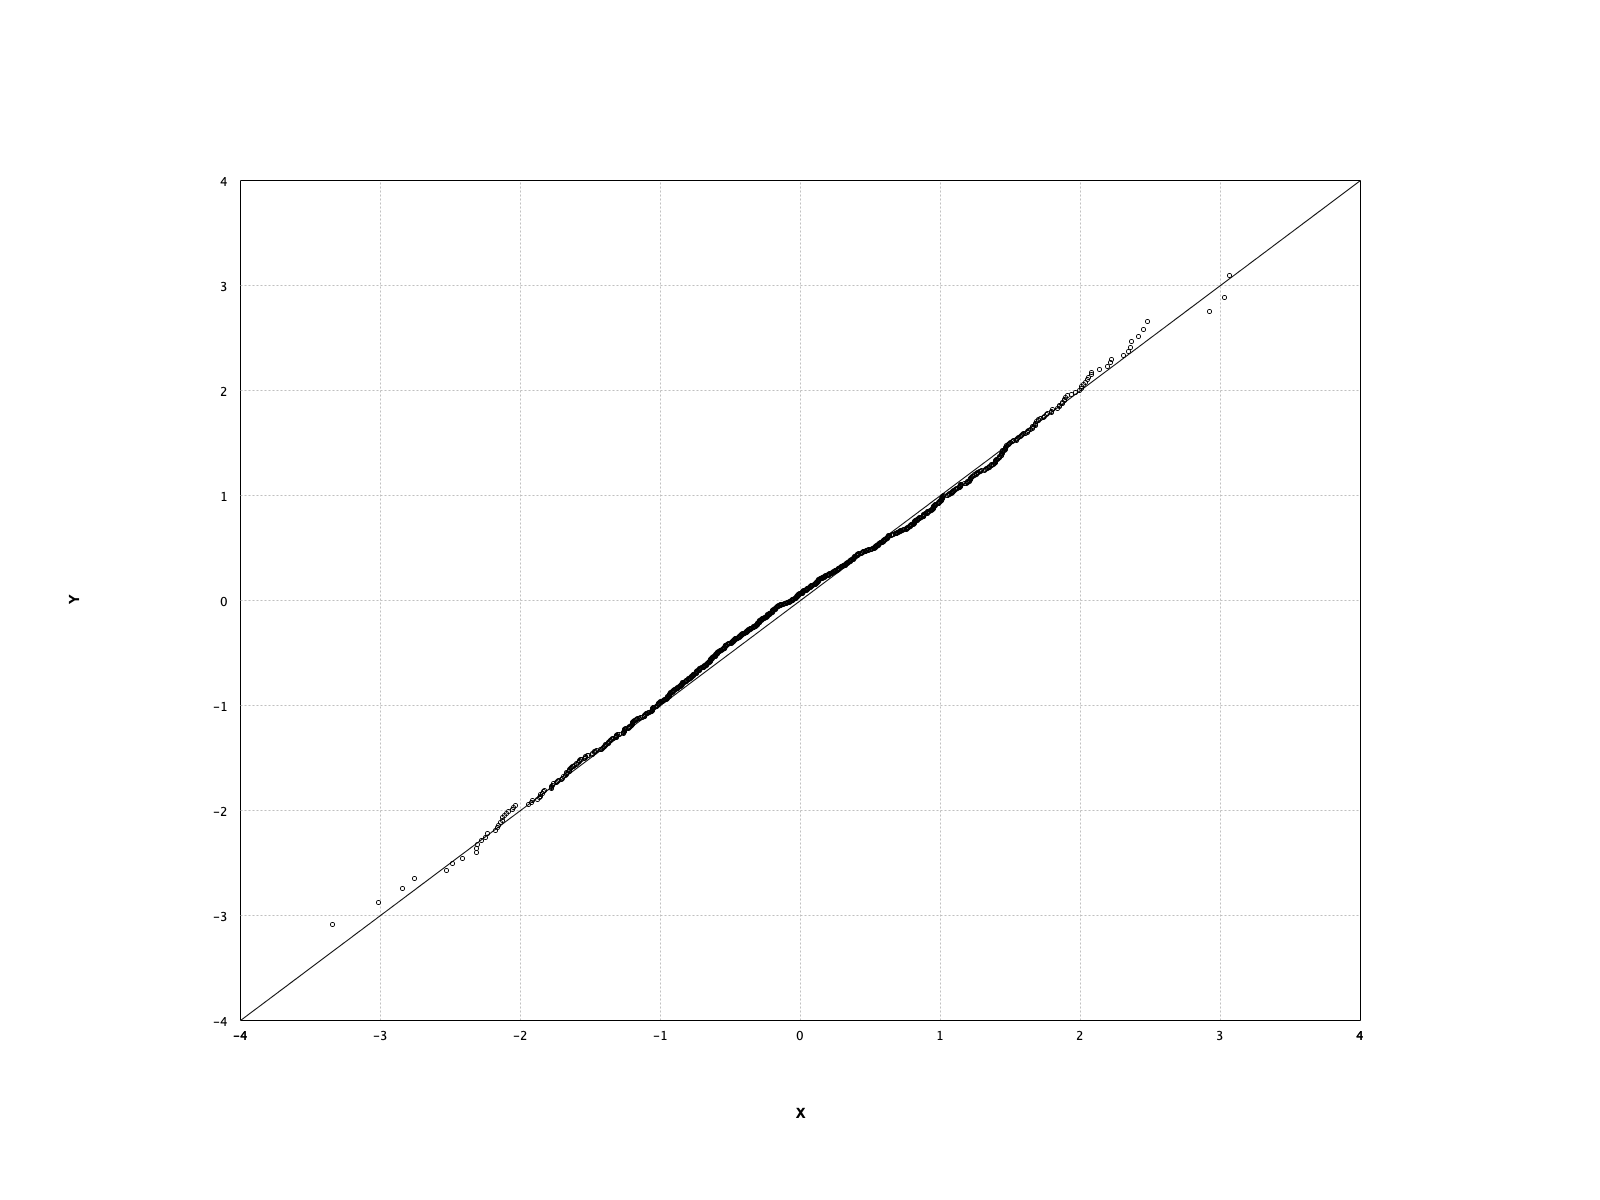

gauss: GaussianDistribution = Gaussian Distribution(0.0000, 1.0000)
data: IndexedSeq[Double] = Vector(
  -0.5871017924489046,
  1.1465996107591239,
  -1.1794947106775469,
  1.1430504839363467,
  1.7042972836192816,
  1.0818061669149222,
  0.38645178966093313,
  -1.3622274348187795,
  -0.8298482024769407,
  -1.7775628469562053,
  -0.8195651857457751,
  -1.4507143760751942,
  -0.48861519516865665,
  -0.3770358444244767,
  -0.43016729540965537,
  -0.3693126313683157,
  0.5146356731825577,
  -0.8494515386000598,
  0.275322925811092,
  -1.0512114892405582,
  -0.8679783124197716,
  -0.8808664362818801,
  0.7175319352633184,
  -0.5300765999087376,
  -1.4271509730566787,
  -0.6298813104259795,
  -1.3370848268774458,
  0.9909169812994534,
  -0.9325646794846392,
  1.2296423024676162,
  1.440914165250757,
  1.3693923546170284,
  0.8164004289959702,
  0.019944841564373848,
  -0.4207135653333075,
  1.0906665165424834,
  -0.38710628374725653,
  0.5386334778769557,
...

In [13]:
val gauss = new GaussianDistribution(0.0, 1.0)
val data = (0 until 1000) map { i: Int => gauss.rand }
show(qqplot(data.toArray))

In fact, this is also a good visual way to verify the quality of our random number generator.

## Heatmap

A heat map is a graphical representation of data where the values in a matrix are represented as colors. In cluster analysis, researchers often employs the heat map by permuting the rows and the columns of a matrix to place similar values near each other according to the clustering.
```
    def heatmap(z: Array[Array[Double]]): PlotCanvas
    def heatmap(z: Array[Array[Double]], palette: Array[Color]): PlotCanvas
    def heatmap(x: Array[Double], y: Array[Double], z: Array[Array[Double]]): PlotCanvas
    def heatmap(x: Array[Double], y: Array[Double], z: Array[Array[Double]], palette: Array[Color]): PlotCanvas

    def heatmap(rowLabels: Array[String], columnLabels: Array[String], z: Array[Array[Double]]): PlotCanvas
    def heatmap(rowLabels: Array[String], columnLabels: Array[String], z: Array[Array[Double]], palette: Array[Color]): PlotCanvas
``` 
where `z` is the matrix to display and the optional parameters `x` and `y` are the coordinates of data matrix cells, which must be in ascending order. Alternatively, one can also provide labels as the coordinates, which is a common practice in cluster analysis.

In what follows, we display the heat map of a matrix. We starts with a small `4 x 4` matrix and enlarge it with bicubic interpolation. We also use the helper class Palette to generate the color scheme. This class provides many other color schemes.


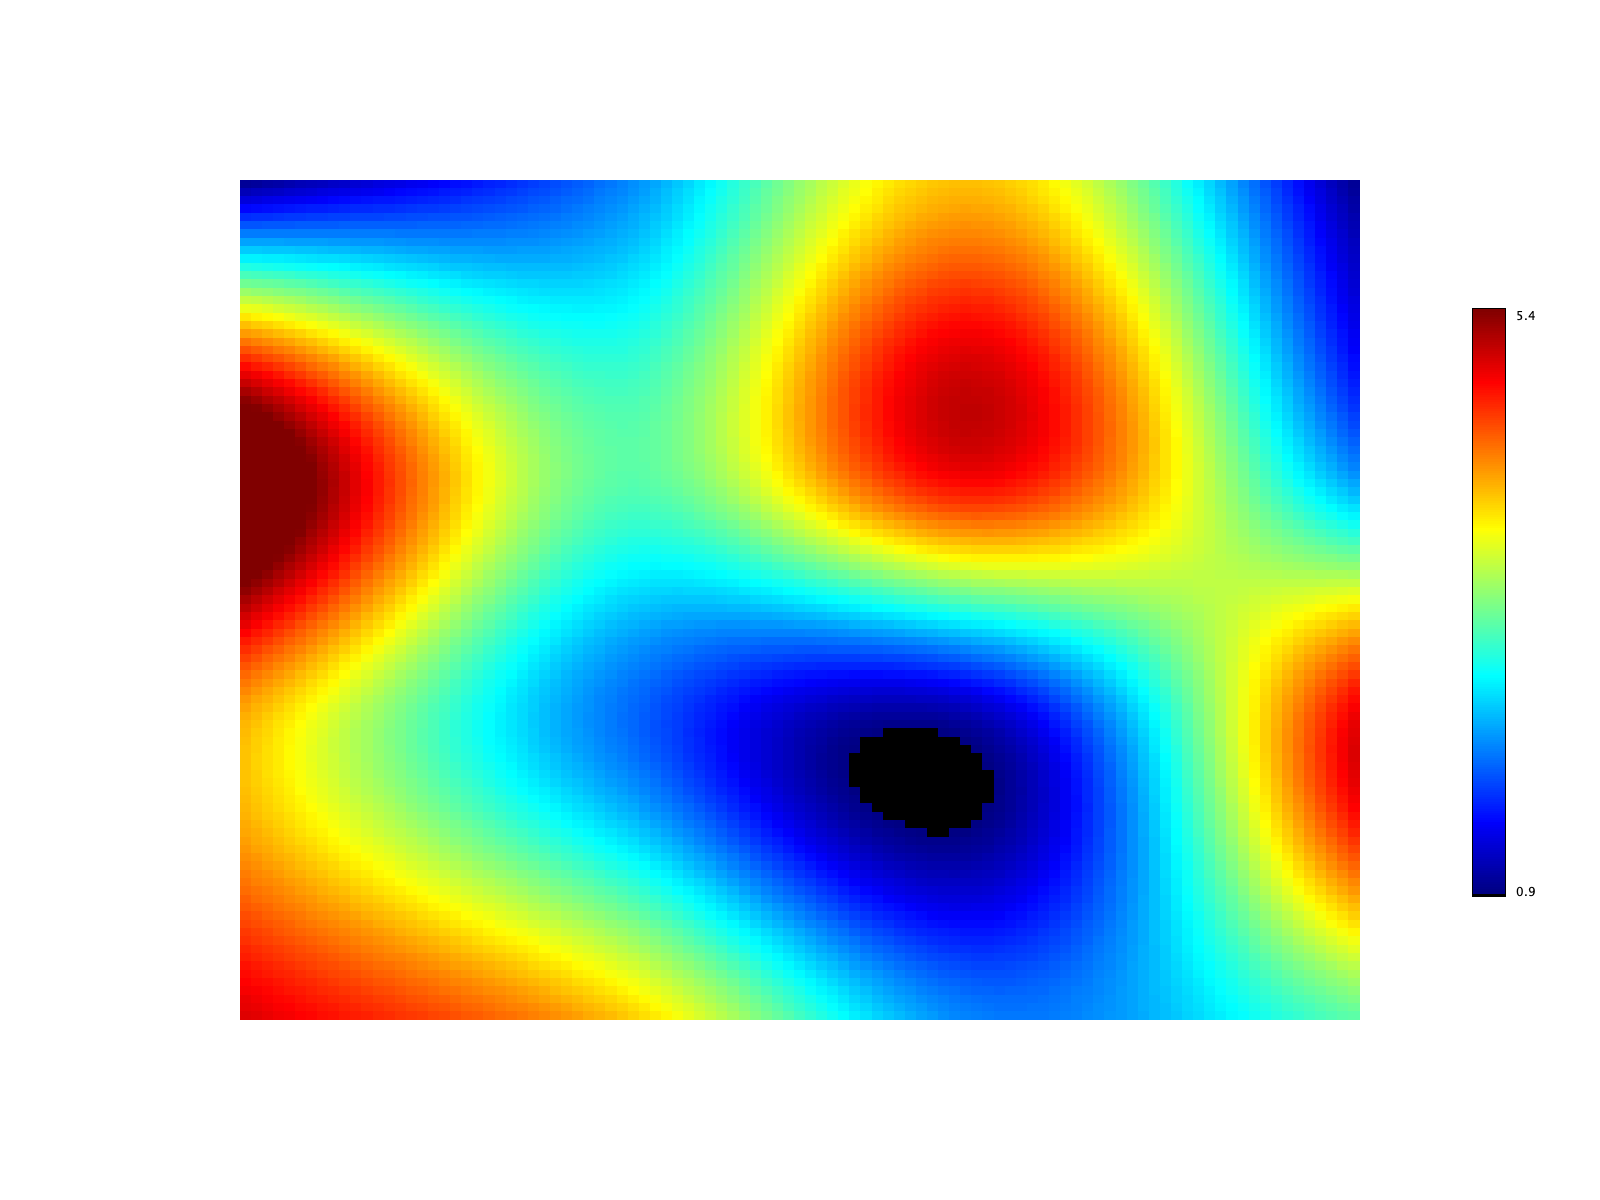

z: Array[Array[Double]] = Array(
  Array(1.0, 2.0, 4.0, 1.0),
  Array(6.0, 3.0, 5.0, 2.0),
  Array(4.0, 2.0, 1.0, 5.0),
  Array(5.0, 4.0, 2.0, 3.0)
)
x: Array[Double] = Array(0.0, 1.0, 2.0, 3.0)
y: Array[Double] = Array(0.0, 1.0, 2.0, 3.0)
bicubic: BicubicInterpolation = BiCubic Interpolation
Z: Array[Array[Double]] = Array(
  Array(
    1.0,
    1.0295635,
    1.058308,
    1.0863145,
    1.113664,
    1.1404375,
    1.166716,
    1.1925805,
    1.218112,
    1.2433915,
    1.2685,
    1.2935185,
    1.318528,
    1.3436095,
    1.368844,
    1.3943124999999998,
    1.420096,
    1.4462755,
    1.4729320000000001,
    1.5001465,
    1.528,
    1.5565734999999998,
    1.585948,
    1.6162044999999998,
    1.647424,
    1.6796875,
    1.713076,
    1.7476705,
    1.7835519999999998,
    1.8208015,
    1.8595,
    1.8997284999999997,
    1.941568,
    1.9850995,
    2.031376,
    2.083375,
    2.140864,
...

In [14]:
// the matrix to display
val z = Array(
  Array(1.0, 2.0, 4.0, 1.0),
  Array(6.0, 3.0, 5.0, 2.0),
  Array(4.0, 2.0, 1.0, 5.0),
  Array(5.0, 4.0, 2.0, 3.0)
)

// make the matrix larger with bicubic interpolation
val x = Array(0.0, 1.0, 2.0, 3.0)
val y = Array(0.0, 1.0, 2.0, 3.0)
val bicubic = new BicubicInterpolation(x, y, z)
val Z = Array.ofDim[Double](101, 101)
for (i <- 0 to 100) {
  for (j <- 0 to 100)
    Z(i)(j) = bicubic.interpolate(i * 0.03, j * 0.03)
}

show(heatmap(Z, Palette.jet(256)))

A special case of heat map is to draw the sparsity pattern of a matrix.
```
    def spy(matrix: SparseMatrix): PlotCanvas
``` 
The structure of sparse matrix is critical in solving linear systems.    


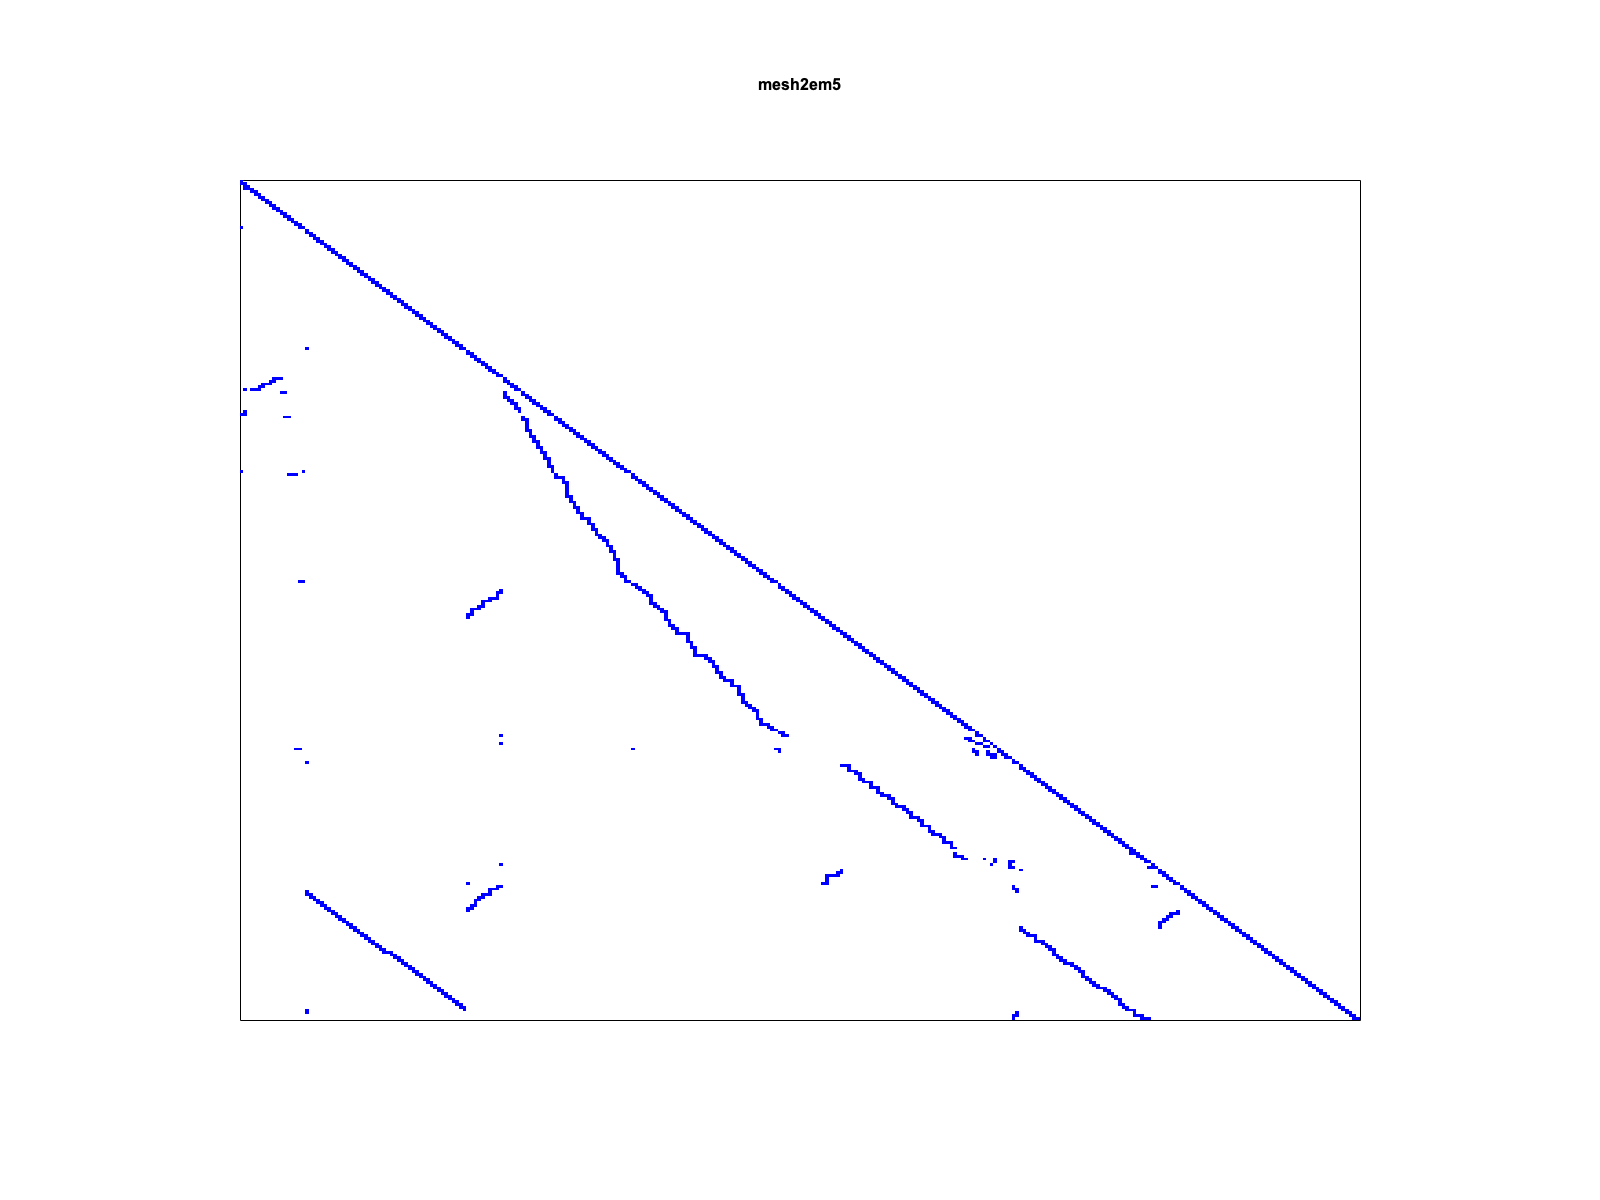

sparse: SparseMatrix = smile.math.matrix.SparseMatrix@12fe51a8
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res14_2: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [15]:
val sparse = SparseMatrix.text(java.nio.file.Paths.get("data/matrix/mesh2em5.txt"))
val canvas = spy(sparse)
canvas.setTitle("mesh2em5")
show(canvas)

## Contour

A contour plot represents a 3-dimensional surface by plotting constant z slices, called contours, on a 2-dimensional format. That is, given a value for z, lines are drawn for connecting the (x, y) coordinates where that z value occurs.
```
    def contour(z: Array[Array[Double]]): PlotCanvas
    def contour(z: Array[Array[Double]], levels: Array[Double], palette: Array[Color]): PlotCanvas
    def contour(x: Array[Double], y: Array[Double], z: Array[Array[Double]]): PlotCanvas
    def contour(x: Array[Double], y: Array[Double], z: Array[Array[Double]], levels: Array[Double], palette: Array[Color]): PlotCanvas
``` 
Similar to heatmap, the parameters x and y are the coordinates of data matrix cells, which must be in ascending order. The slice values can be automatically determined from the data, or provided through the parameter levels.

Contours are often jointly used with the heat map. In the following example, we add the contour lines to the previous heat map exampl.


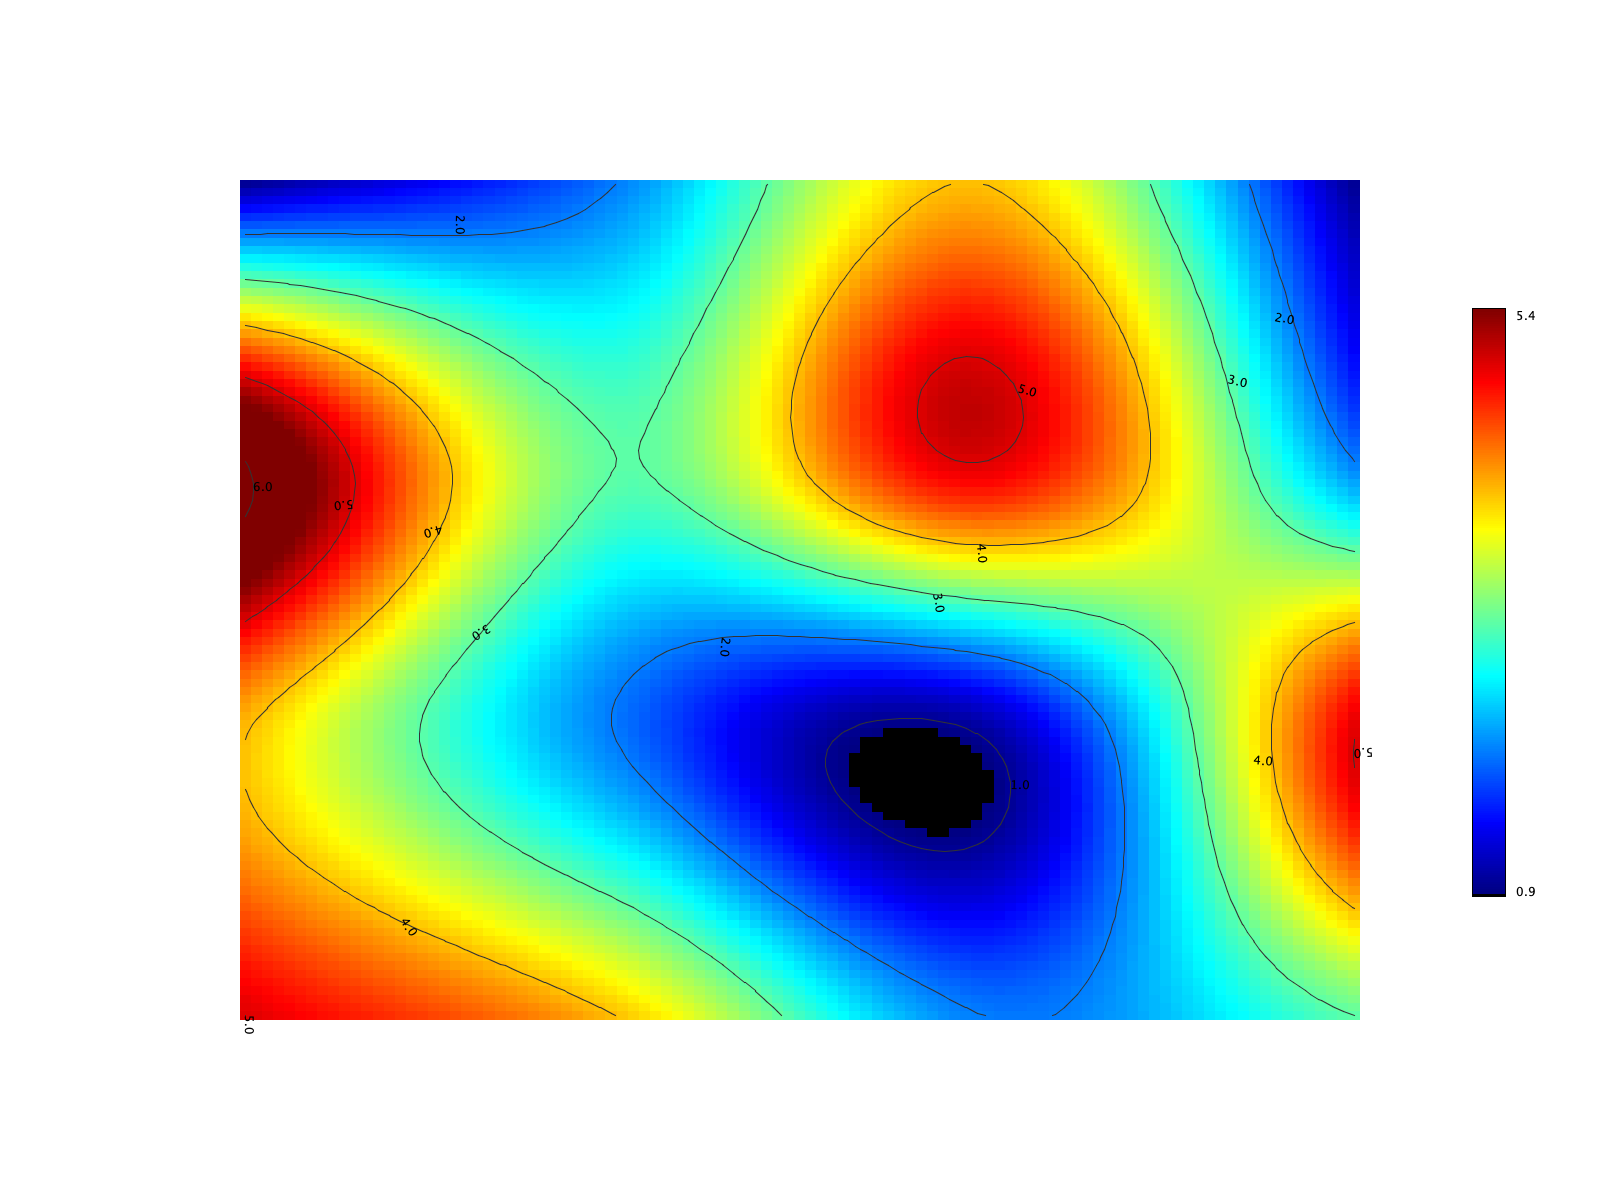

canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@47915f8b,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]

In [16]:
val canvas = heatmap(Z, Palette.jet(256))
canvas.add(new Contour(Z))
show(canvas)

This example also shows how to mix multiple plots together.

## Surface
Besides heat map and contour, we can also visualize a matrix with the three-dimensional shaded surface.
```
    def surface(z: Array[Array[Double]]): PlotCanvas
    def surface(z: Array[Array[Double]], palette: Array[Color]): PlotCanvas
    def surface(x: Array[Double], y: Array[Double], z: Array[Array[Double]]): PlotCanvas
    def surface(x: Array[Double], y: Array[Double], z: Array[Array[Double]], palette: Array[Color]): PlotCanvas
``` 
The usage is similar with heatmap and contour functions.


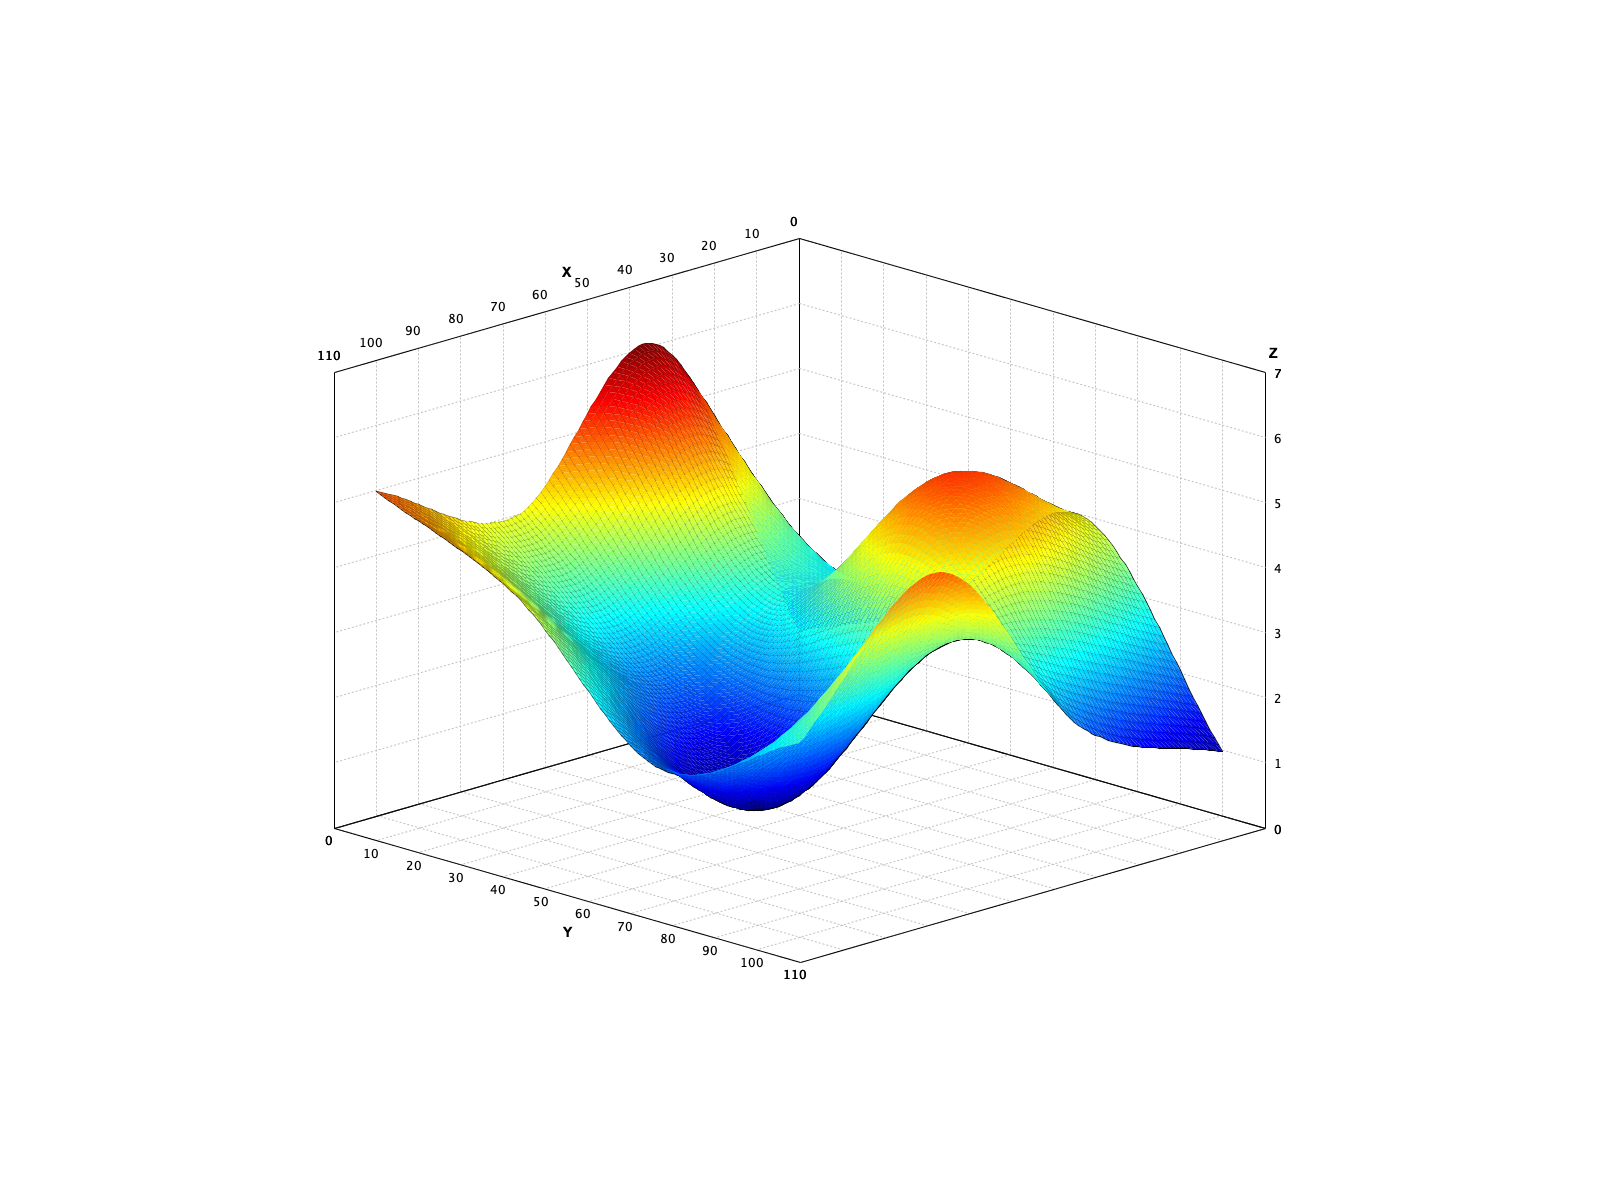

In [17]:
show(surface(Z, Palette.jet(256, 1.0f)))

## Wireframe

The wireframe model is a visual presentation of a three-dimensional physical object. A wireframe model consists of two tables, the vertex table and the edge table. Each entry of the vertex table records a vertex and its coordinate values, while each entry of the edge table has two components giving the two incident vertices of that edge.
```
    def wireframe(vertices: Array[Array[Double]], edges: Array[Array[Int]]): PlotCanvas
``` 
where vertices is an `n x 2` or `n x 3` array which are coordinates of `n` vertices, and edges is an `m x 2` array of which each row is the vertex indices of two end points of each edge.


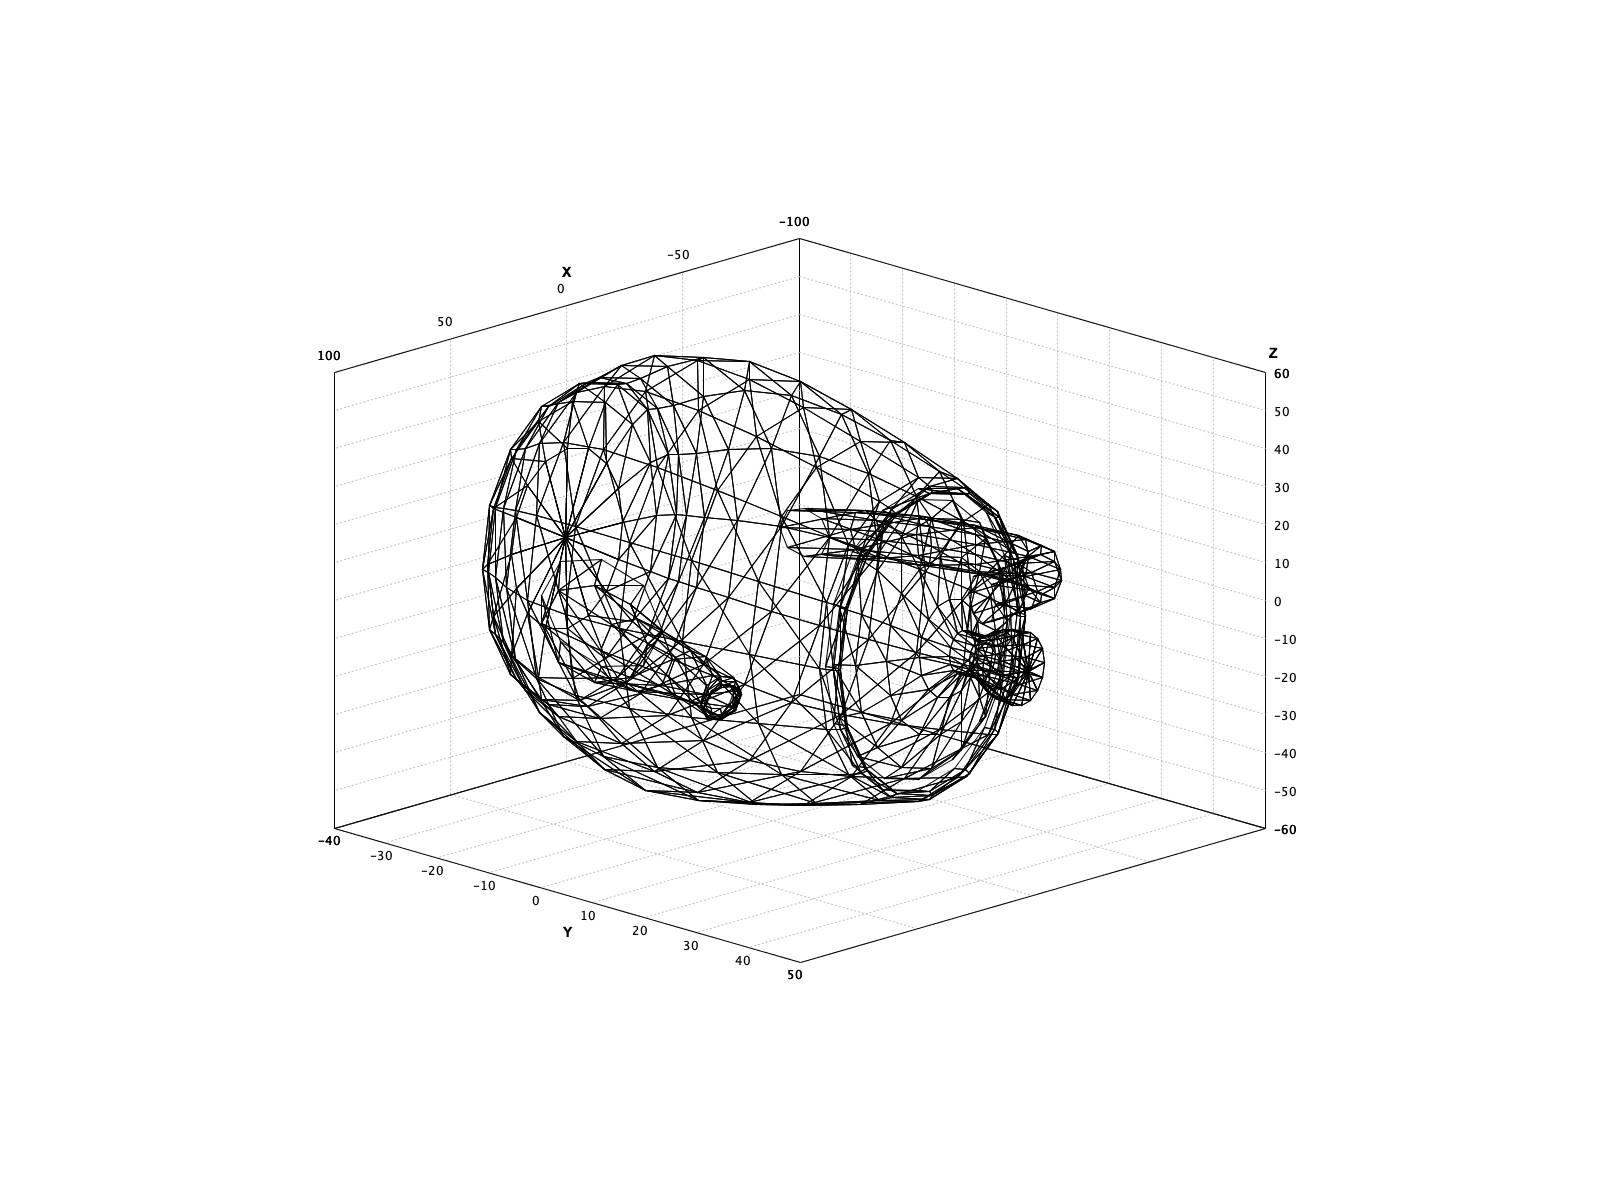

vertices: Array[Array[Double]] = Array(
  Array(40.6266, 28.3457, -1.10804),
  Array(40.0714, 30.4443, -1.10804),
  Array(40.7155, 31.1438, -1.10804),
  Array(42.0257, 30.4443, -1.10804),
  Array(43.4692, 28.3457, -1.10804),
  Array(37.5425, 28.3457, 14.5117),
  Array(37.0303, 30.4443, 14.2938),
  Array(37.6244, 31.1438, 14.5466),
  Array(38.8331, 30.4443, 15.0609),
  Array(40.1647, 28.3457, 15.6274),
  Array(29.0859, 28.3457, 27.1468),
  Array(28.6917, 30.4443, 26.7527),
  Array(29.149, 31.1438, 27.2099),
  Array(30.0792, 30.4443, 28.1402),
  Array(31.1041, 28.3457, 29.165),
  Array(16.4508, 28.3457, 35.6034),
  Array(16.2329, 30.4443, 35.0912),
  Array(16.4857, 31.1438, 35.6853),
  Array(16.9999, 30.4443, 36.894),
  Array(17.5665, 28.3457, 38.2256),
  Array(0.831025, 28.3457, 38.6876),
  Array(0.831025, 30.4443, 38.1324),
  Array(0.831025, 31.1438, 38.7764),
  Array(0.831025, 30.4443, 40.0866),
  Array(0.831025, 28.3457, 41.5301),
  Array(-15.868, 28.3457, 35.6034),
  Array(-15.0262,

In [18]:
val (vertices, edges) = read.wavefront("data/wireframe/teapot.obj")
show(wireframe(vertices, edges))